*This Jupyter Notebook was created by Manuel Klein and belongs to the final project of the Data Science Bootcamp from neuefische Hamburg.*

# US Flight Delay Analysis and Prediction
## Part 2: Data Visualization

After having understood each feature of the dataset, added airport data and performed data cleaning in part one, this notebook focuses on the visualization and understanding of the dependencies of the data.

### Table of Contents

<b>[1. Initial Steps](#anchor_11)</b>
> [1.1 Adjusting Jupyter Notebook Settings](#anchor_11)<br>
> [1.2 Importing necessary libraries](#anchor_12)<br>
> [1.3 Importing the data](#anchor_13)

<b>[2. Data Preparation for Visualization](#anchor_2)</b>
> [2.1 Creating new time-based features](#anchor_21)<br>
> [2.2 Creating airport dataset for geographical plots](#anchor_22)<br>
> [2.3 Creating flight route datasets for geographical plots](#anchor_23)<br>
> [2.4 Creating a dataset for delay reasons analysis](#anchor_24)

<b>[3. Visualization](#anchor_3)</b>

&emsp;&ensp;[3.1 Time Perspective](#anchor_31)
> [3.1.1 Total number of flights per year](#anchor_31)<br>
> [3.1.2 Percentage of delayed flights from 2016 to 2018](#anchor_312)<br>
> [3.1.3 Average delay per year](#anchor_313)<br>
> [3.1.4 Distribution of delay (for the whole dataset)](#anchor_314)<br>
> [3.1.5 Total number of flights per month](#anchor_315)<br>
> [3.1.6 Percentage of delayed flights per month of year](#anchor_316)<br>
> [3.1.7 Average delay per month of year](#anchor_317)<br>
> [3.1.8 Numbers of flights per day of week](#anchor_318)<br>
> [3.1.9 Percentage of delayed flights per day of week](#anchor_319)<br>
> [3.1.10 Average delay per month of year](#anchor_3110)<br>
> [3.1.11 Total number of departures per hour of day](#anchor_3111)<br>
> [3.1.12 Percentage of delayed flights per hour of day](#anchor_3112)<br>
> [3.1.13 Average delay per hour of day](#anchor_3113)<br>

&emsp;&ensp;[3.2 Airline Perspective](#anchor_32)
> [3.2.1 Market share of US airlines (number of flights)](#anchor_32)<br>
> [3.2.2 Distribution of delayed flights per airline](#anchor_322)<br>
> [3.2.3 Percentage of delayed flights per airline](#anchor_323)<br>
> [3.2.4 Average flight delay per airline](#anchor_324)<br>
> [3.2.5 Number of delayed flights per airline per year](#anchor_325)<br>

&emsp;&ensp;[3.3 Airport Perspective](#anchor_33)
> [3.3.1 Absolute market share of 10 most frequented airports](#anchor_33)<br>
> [3.3.2 Relative market share of 10 most frequented airports](#anchor_332)<br>
> [3.3.3 10 Airports with the highest percentage of delayed arrivals](#anchor_333)<br>
> [3.3.4 10 Airports with the highest mean delay for arrivals](#anchor_334)<br>
> [3.3.5 Airport map with airport size and delays](#anchor_335)<br>

&emsp;&ensp;[3.4 Flight Route Perspective](#anchor_34)
> [3.4.1 Flight distance histogram](#anchor_34)<br>
> [3.4.2 Map of all flight routes between 2016 and 2018](#anchor_342)<br>
> [3.4.3 Map with 10 most frequented flight routes](#anchor_343)<br>
> [3.4.4 Map with 10 flight routes with hightest delay score](#anchor_344)<br>

&emsp;&ensp;[3.5 Reasons for Delay](#anchor_35)
> [3.5.1 Delay Reasons Segmentation](#anchor_351)<br>
> [3.5.2 Delay Reasons Matrix](#anchor_352)<br>
> [3.5.3 Mean Delay for each Delay Reason](#anchor_353)<br>
> [3.5.4 Histograms for Delay Reasons](#anchor_354)<br>
> [3.5.5 Extreme Weather Example: Hurricane Irma](#anchor_355)<br>

<br>


<a id='anchor_11'></a>

## 1. Initial Steps

### 1.1 Adjusting Jupyter Notebook Settings

In [1]:
# Adjusting the Jupyter Notebook window width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
# Markdown tables left alignment and markdown table cell content left aligment:

In [3]:
%%html
<style> 
table {float:left}
table td, table th, table tr {text-align:left !important;}
</style>


<a id='anchor_12'></a>

### 1.2 Importing necessary libraries

In [4]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import glob
import datetime
import missingno as msno
import pytz
from datetime import datetime
from pytz import timezone
import folium
from folium.plugins import MarkerCluster
#from mpl_toolkits.basemap import Basemap
#import plotly as py
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_recall_fscore_support
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, cross_val_predict

In [5]:
# setting pandas display options to have more columns shown in .head() etc.
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 400)


<a id='anchor_13'></a>

### 1.3 Importing the data

In [6]:
df = pd.read_pickle(r'C:\Project_Data_NF/dfendofstep5.pkl')


<a id='anchor_2'></a>

## 2. Data Preparation for Visualization 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18193815 entries, 0 to 18193814
Data columns (total 43 columns):
FL_DATE                    datetime64[ns]
FL_DAYOFWEEK               int64
AIRLINE_ID                 object
AIRLINE_NAME               object
FL_NUMBER                  int64
DEP_AIRPORT                object
ARR_AIRPORT                object
DISTANCE                   int64
DEP_TIME_PLANNED           int64
DEP_TIME                   float64
DEP_DELAY                  float64
TAXI_OUT_DURATION          float64
WHEELS_OFF_TIME            float64
WHEELS_ON_TIME             float64
IN_AIR_DURATION            float64
TAXI_IN_DURATION           float64
ARR_TIME_PLANNED           int64
ARR_TIME                   float64
ARR_DELAY                  float64
TRAVEL_DURATION_PLANNED    float64
TRAVEL_DURATION            float64
CARRIER_DELAY              float64
WEATHER_DELAY              float64
NAS_DELAY                  float64
SECURITY_DELAY             float64
LATE_AIRCRAFT_DEL

In [8]:
df.head()

FL_DATE  FL_DAYOFWEEK AIRLINE_ID      AIRLINE_NAME  FL_NUMBER  \
0 2016-01-01             4         DL   Delta Air Lines       1248   
1 2016-01-01             4         DL   Delta Air Lines       1706   
2 2016-01-01             4         DL   Delta Air Lines       1719   
3 2016-01-01             4         NK  Spirit Airlines,        706   
4 2016-01-02             5         DL   Delta Air Lines        789   

  DEP_AIRPORT ARR_AIRPORT  DISTANCE  DEP_TIME_PLANNED  DEP_TIME  DEP_DELAY  \
0         DTW         LAX      1979              1935    1935.0        0.0   
1         DTW         LAX      1979               830     823.0       -7.0   
2         DTW         LAX      1979              1205    1208.0        3.0   
3         DTW         LAX      1979              1955    1955.0        0.0   
4         DTW         LAX      1979              2130    2128.0       -2.0   

   TAXI_OUT_DURATION  WHEELS_OFF_TIME  WHEELS_ON_TIME  IN_AIR_DURATION  \
0               23.0           1958.0          2107.0            249.0   
1               24.0            847.0          1012.0            265.0   
2               13.0           1221.0          1352.0            271.0   
3               37.0           2032.0          2145.0            253.0   
4               15.0           2143.0          2301.0            258.0   

   TAXI_IN_DURATION  ARR_TIME_PLANNED  ARR_TIME  ARR_DELAY  \
0              13.0              2144    2120.0      -24.0   
1               7.0              1046    1019.0      -27.0   
2               7.0              1416    1359.0      -17.0   
3              44.0              2157    2229.0       32.0   
4              10.0              2340    2311.0      -29.0   

   TRAVEL_DURATION_PLANNED  TRAVEL_DURATION  CARRIER_DELAY  WEATHER_DELAY  \
0                    309.0            285.0            NaN            NaN   
1                    316.0            296.0            NaN            NaN   
2                    311.0            291.0            NaN            NaN   
3                    302.0            334.0            0.0            0.0   
4                    310.0            283.0            NaN            NaN   

   NAS_DELAY  SECURITY_DELAY  LATE_AIRCRAFT_DELAY  \
0        NaN             NaN                  NaN   
1        NaN             NaN                  NaN   
2        NaN             NaN                  NaN   
3       32.0             0.0                  0.0   
4        NaN             NaN                  NaN   

                            DEP_AIRPORT_NAME DEP_CITY    DEP_LAT   DEP_LONG  \
0  Detroit Metropolitan Wayne County Airport  Detroit  42.212399 -83.353401   
1  Detroit Metropolitan Wayne County Airport  Detroit  42.212399 -83.353401   
2  Detroit Metropolitan Wayne County Airport  Detroit  42.212399 -83.353401   
3  Detroit Metropolitan Wayne County Airport  Detroit  42.212399 -83.353401   
4  Detroit Metropolitan Wayne County Airport  Detroit  42.212399 -83.353401   

   DEP_ALT DEP_UTC            DEP_TZ                   ARR_AIRPORT_NAME  \
0      645      -5  America/New_York  Los Angeles International Airport   
1      645      -5  America/New_York  Los Angeles International Airport   
2      645      -5  America/New_York  Los Angeles International Airport   
3      645      -5  America/New_York  Los Angeles International Airport   
4      645      -5  America/New_York  Los Angeles International Airport   

      ARR_CITY    ARR_LAT    ARR_LONG  ARR_ALT ARR_UTC               ARR_TZ  \
0  Los Angeles  33.942501 -118.407997      125      -8  America/Los_Angeles   
1  Los Angeles  33.942501 -118.407997      125      -8  America/Los_Angeles   
2  Los Angeles  33.942501 -118.407997      125      -8  America/Los_Angeles   
3  Los Angeles  33.942501 -118.407997      125      -8  America/Los_Angeles   
4  Los Angeles  33.942501 -118.407997      125      -8  America/Los_Angeles   

  DEP_DATETIME_PLANNED  OVERMIDNIGHT ARR_DATETIME_PLANNED  
0  2016-01-01 19:35:00             0  2016-01-01 21:44


<a id='anchor_21'></a>

### 2.1 Creating new time-based features

In [ ]:
# Creating a new feature containing the departure hours
df['DEP_HOUR_PLANNED'] = df['DEP_DATETIME_PLANNED'].map(lambda x: x.strftime('%H')) # Creating a feature for the planned departure hour as int
df['DEP_HOUR_PLANNED'] = df['DEP_HOUR_PLANNED'].astype('int')

In [ ]:
# Extracting year and month from timedate and saving them in separate features
df['FL_YEAR'] = df['FL_DATE'].map(lambda x: x.strftime('%Y')) # Extracting the year from the date into a separate column
df['FL_MONTH'] = df['FL_DATE'].map(lambda x: x.strftime('%m')) # Extracting the year from the date into a separate column
df['FL_MONTH'].replace({'01': 'January', '02': 'February', '03': 'March', '04': 'April', '05': 'May', '06': 'June', 
                         '07': 'July', '08': 'August', '09': 'September', '10': 'October', '11': 'November', '12': 'December'}, inplace=True)

In [ ]:
# Creating a new dataframe for ressource-efficient plotting
df_delay = df[['FL_DATE', 'DISTANCE','DEP_DELAY', 'ARR_DELAY', 'AIRLINE_NAME', 'DEP_AIRPORT_NAME', 'ARR_AIRPORT_NAME','FL_DAYOFWEEK', 'FL_MONTH', 'FL_YEAR', 'DEP_HOUR_PLANNED']] # Copying the necessary features
df_delay['FL_DAYOFWEEK'].replace({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}, inplace=True)
df_delay['DEP_DELAY_0'] = np.where(df_delay['DEP_DELAY'] > 0, 1, 0) # Creating a column containing 1 for delay and 0 for no delay
df_delay['ARR_DELAY_0'] = np.where(df_delay['ARR_DELAY'] > 0, 1, 0) # Creating a column containing 1 for delay and 0 for no delay
df_delay['ARR_DELAY_15'] = np.where(df_delay['ARR_DELAY'] >= 15, 1, 0) # Creating a column containing 1 for delay and 0 for no delay

In [ ]:
df_delay.head(3)

In [ ]:
df_delay.to_pickle(r'C:\Project_Data_NF\df_delay.pkl')


<a id='anchor_22'></a>

### 2.2 Creating airport dataset for geographical plots

In [ ]:
df_geo_airports = df[['DEP_AIRPORT', 'DEP_AIRPORT_NAME', 'DEP_LAT', 'DEP_LONG', 'DEP_ALT', 'DEP_UTC']]

In [ ]:
df_geo_airports.head(3)

In [ ]:
df_geo_airports.drop_duplicates(keep='first', inplace=True)

In [ ]:
df_geo_airports.sort_values(by=['DEP_AIRPORT'], inplace=True)

In [ ]:
# Resetting the index, so that the last ID is equal to the number of rows in the dataset
# Necessary after rows have been dropped, so that access via index (e.g. .iloc) works correctly
df_geo_airports.reset_index(inplace=True)
df_geo_airports.drop(columns=['index'], inplace=True)

In [ ]:
df_geo_airports.head()

In [ ]:
df_geo_airports.shape

In [ ]:
airport_list = list(df_geo_airports['DEP_AIRPORT'].values)

In [ ]:
# Calculating delayed flights for each airport
flights_delayed_per_airport = []
for i in airport_list:
    flights_delayed_per_airport.append((len(df[(df['ARR_DELAY'] > 0) & (df['DEP_AIRPORT'] == i)])))

In [ ]:
df_geo_airports['no_of_flights_delayed'] = pd.Series(flights_delayed_per_airport).values

In [ ]:
# Calculating number of all flights for each airport
airport_list = list(df_geo_airports['DEP_AIRPORT'].values)
flights_complete_per_airport = []
for i in airport_list:
    flights_complete_per_airport.append((len(df[(df['DEP_AIRPORT'] == i)])))

In [ ]:
df_geo_airports['no_of_flights'] = pd.Series(flights_complete_per_airport).values

In [ ]:
df_geo_airports.head()

In [ ]:
df_geo_airports['percentage_delayed'] = df_geo_airports['no_of_flights_delayed'] / df_geo_airports['no_of_flights']

In [ ]:
df_geo_airports.head()

In [ ]:
df_geo_airports.describe().loc[['min','max']]

In [ ]:
df_geo_airports.to_pickle(r'C:\Project_Data_NF\df_geo_airports.pkl')


<a id='anchor_23'></a>

### 2.3 Creating flight route datasets for geographical plots

In [ ]:
df['FLIGHTROUTE_BASE'] = df['DEP_AIRPORT'] + df['ARR_AIRPORT']

In [ ]:
(df['FLIGHTROUTE_BASE'].unique()).shape

In [ ]:
flightroutes = list(df['FLIGHTROUTE_BASE'].unique())

In [ ]:
len(flightroutes)

In [ ]:
flightroutes_bothdirections = []
for i in flightroutes:
    if i not in flightroutes_bothdirections:
        if (i[3:6] + i[0:3]) not in flightroutes_bothdirections:
            flightroutes_bothdirections.append(i)

In [ ]:
len(flightroutes_bothdirections)

In [ ]:
def routeadjustment(x):
    if x not in flightroutes_bothdirections:
        return (x[3:6] + x[0:3])
    else:
        return x

In [ ]:
df['FLIGHTROUTE'] = df['FLIGHTROUTE_BASE'].apply(routeadjustment)

In [ ]:
df['FLIGHTROUTE'].unique().shape

In [ ]:
df['FLIGHTROUTE_DEP'] = df['FLIGHTROUTE']
df['FLIGHTROUTE_ARR'] = df['FLIGHTROUTE']

In [ ]:
def firstthreechar(x):
    return x[0:3]

def lastthreechar(x):
    return x[3:6]

In [ ]:
df['FLIGHTROUTE_DEP'] = df['FLIGHTROUTE_DEP'].apply(firstthreechar)
df['FLIGHTROUTE_ARR'] = df['FLIGHTROUTE_ARR'].apply(lastthreechar)

In [ ]:
df.drop(columns=['FLIGHTROUTE_BASE'], inplace=True)

In [ ]:
df.head(3)

In [ ]:
df2 = df.copy()

In [ ]:
df2['ARR_DELAY_0'] = np.where(df2['ARR_DELAY'] > 0, 1, 0) # Creating a column containing 1 for delay and 0 for no delay

In [ ]:
df2 = df2.drop_duplicates(subset='FLIGHTROUTE', keep='first')

In [ ]:
df2.head(3)

In [ ]:
df_flightroutes = pd.DataFrame(flightroutes_bothdirections)

In [ ]:
df_flightroutes.rename(columns={0:'FLIGHTROUTE'}, inplace=True)

In [ ]:
df_flightroutes.sort_values(by=['FLIGHTROUTE'], inplace=True)

In [ ]:
# Resetting the index, so that the last ID is equal to the number of rows in the dataset
# Necessary after rows have been dropped, so that access via index (e.g. .iloc) works correctly
df_flightroutes.reset_index(inplace=True)
df_flightroutes.drop(columns=['index'], inplace=True)

In [ ]:
df_flightroutes.head()

In [ ]:
df_flightroutes = pd.merge(df_flightroutes, df2[['DEP_AIRPORT', 'DEP_AIRPORT_NAME', 'DEP_LAT', 'DEP_LONG', 'ARR_AIRPORT', 'ARR_AIRPORT_NAME', 'ARR_LAT', 'ARR_LONG', 'DISTANCE', 'FLIGHTROUTE_DEP', 'FLIGHTROUTE_ARR', 'FLIGHTROUTE']], on='FLIGHTROUTE')

In [ ]:
df_flightroutes.head()

In [ ]:
df_flightroutes['no_of_flights'] = pd.Series(df['FLIGHTROUTE'].value_counts().sort_index().values).values

In [ ]:
flightroutes_bothdirections.sort()

In [ ]:
# Calculating number of all delayed flights for each airport
no_flights_delayed = []
for i in flightroutes_bothdirections:
    no_flights_delayed.append((len(df[(df['FLIGHTROUTE'] == i) & (df['ARR_DELAY'] > 0)])))

In [ ]:
df_flightroutes['no_flights_delayed'] = pd.Series(no_flights_delayed).values

In [ ]:
df_flightroutes['percentage_delayed'] = df_flightroutes['no_flights_delayed'] / df_flightroutes['no_of_flights']

In [ ]:
# Calculating mean value of all delayed flights for each airport
mean_delay = []
for i in flightroutes_bothdirections:
    mean_delay.append((df[(df['FLIGHTROUTE'] == i) & (df['ARR_DELAY'] > 0)]['ARR_DELAY'].values.mean()))

In [ ]:
df_flightroutes['mean_delay'] = pd.Series(mean_delay).values

In [ ]:
df_flightroutes['delay_score'] = df_flightroutes['percentage_delayed'] * df_flightroutes['mean_delay']

In [ ]:
df_flightroutes.head()

In [ ]:
df_flightroutes.to_pickle(r'C:\Project_Data_NF\df_flightroutes.pkl')

<b>Creating dataframe for 10 flight routes with highest number of flights</b>

In [ ]:
df_flightroutes_top10 = df_flightroutes.sort_values(by=['no_of_flights'], ascending=False)

In [ ]:
# Resetting the index, so that the last ID is equal to the number of rows in the dataset
# Necessary after rows have been dropped, so that access via index (e.g. .iloc) works correctly
df_flightroutes_top10.reset_index(inplace=True)
df_flightroutes_top10.drop(columns=['index'], inplace=True)

In [ ]:
df_flightroutes_top10 = df_flightroutes_top10.iloc[:10]

In [ ]:
df_flightroutes_top10.to_pickle(r'C:\Project_Data_NF\df_flightroutes_top10.pkl')

<b>Creating dataframe for 10 flight routes with highest delay score</b>

In [ ]:
df_flightroutes_top10_delay_Score = df_flightroutes.sort_values(by=['delay_score'], ascending=False)

In [ ]:
df_flightroutes_top10_delay_Score.describe().loc[['min','max', 'mean']]

In [ ]:
plt.figure(figsize = (16,8))
plt.xlim(-5000, 25000)
plt.title('Histogram for number of flights per airport', fontsize=18)
sns.distplot(df_flightroutes_top10_delay_Score['no_of_flights'], bins=500);

In [ ]:
df_flightroutes_top10_delay_Score = df_flightroutes_top10_delay_Score[df_flightroutes_top10_delay_Score['no_of_flights'] >= 150]

In [ ]:
# Resetting the index, so that the last ID is equal to the number of rows in the dataset
# Necessary after rows have been dropped, so that access via index (e.g. .iloc) works correctly
df_flightroutes_top10_delay_Score.reset_index(inplace=True)
df_flightroutes_top10_delay_Score.drop(columns=['index'], inplace=True)

In [ ]:
df_flightroutes_top10_delay_Score = df_flightroutes_top10_delay_Score.iloc[:10]

In [ ]:
df_flightroutes_top10_delay_Score.head()

In [ ]:
df_flightroutes_top10_delay_Score.to_pickle(r'C:\Project_Data_NF\df_flightroutes_top10_delay_Score.pkl')


<a id='anchor_24'></a>

### 2.4 Creating a dataset for delay reasons analysis

In [ ]:
df_delay_reasons = df[['DEP_DELAY', 'ARR_DELAY', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']]

In [ ]:
# Check if there are no delay reasons if the flight arrived on time --> OK!
df_delay_reasons[df_delay_reasons['ARR_DELAY'] <= 0].isna().sum() / len(df_delay_reasons[df_delay_reasons['ARR_DELAY'] <= 0])

In [ ]:
# For around 50% of the delayed flights, delay reason columns are filled
df_delay_reasons[df_delay_reasons['ARR_DELAY'] > 0].isna().sum() / len(df_delay_reasons[df_delay_reasons['ARR_DELAY'] > 0])

In [ ]:
# Dropping all NaN rows of the delay dataset
df_delay_reasons = df_delay_reasons.dropna()

In [ ]:
df_delay_reasons.head(100)

In [ ]:
df_delay_reasons.to_pickle(r'C:\Project_Data_NF\df_delay_reasons.pkl')

In [ ]:
df.to_pickle(r'C:\Project_Data_NF\df_plot.pkl')


<a id='anchor_3'></a>

## 3. Data Visualization

In [9]:
df = pd.read_pickle(r'C:\Project_Data_NF/df_plot.pkl')

In [10]:
df_delay = pd.read_pickle(r'C:\Project_Data_NF/df_delay.pkl')

In [11]:
df_geo_airports = pd.read_pickle(r'C:\Project_Data_NF\df_geo_airports.pkl')

In [12]:
df_flightroutes = pd.read_pickle(r'C:\Project_Data_NF\df_flightroutes.pkl')

In [13]:
df_flightroutes_top10 = pd.read_pickle(r'C:\Project_Data_NF\df_flightroutes_top10.pkl')

In [14]:
df_flightroutes_top10_delay_Score = pd.read_pickle(r'C:\Project_Data_NF\df_flightroutes_top10_delay_Score.pkl')

In [15]:
df_delay_reasons = pd.read_pickle(r'C:\Project_Data_NF/df_delay_reasons.pkl')


<a id='anchor_31'></a>

### 3.1 Time Perspective

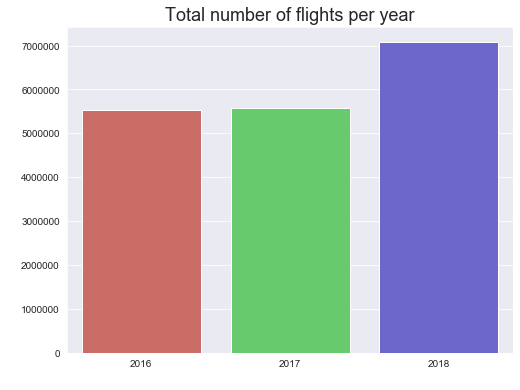

In [16]:
# 3.1.1 Plotting the total number of flights per year
sns.set_style("darkgrid")
plt.figure(figsize = (8,6))
plt.title('Total number of flights per year', fontsize=18)
sns.countplot(x=df_delay['FL_YEAR'], palette="hls")
plt.xlabel(' ', fontsize=12)
plt.ylabel(' ', fontsize=12)
rc={'axes.labelsize': 14, 'axes.titlesize': 14, 'xtick.labelsize': 14, 'ytick.labelsize': 14}
plt.rcParams.update(**rc)


<a id='anchor_312'></a>

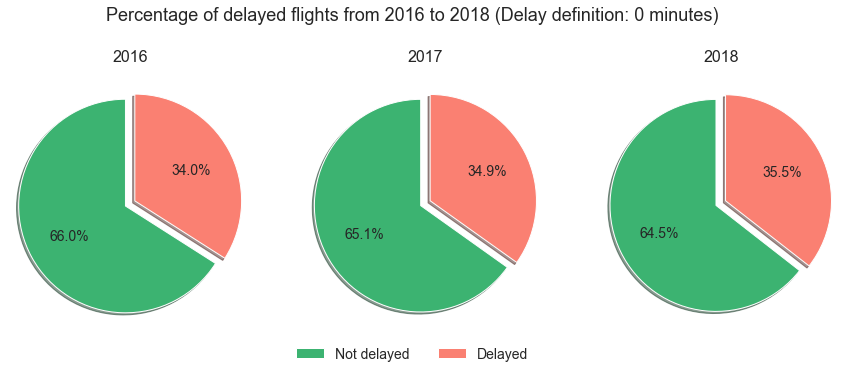

In [17]:
# 3.1.2a Pie charts (Delay definition: 0 minutes)
labels = ['Not delayed', 'Delayed']
sizes2016 = df_delay[df_delay['FL_YEAR'] == '2016']['ARR_DELAY_0'].value_counts().values
sizes2017 = df_delay[df_delay['FL_YEAR'] == '2017']['ARR_DELAY_0'].value_counts().values
sizes2018 = df_delay[df_delay['FL_YEAR'] == '2018']['ARR_DELAY_0'].value_counts().values

fig1, (ax1, ax2, ax3) = plt.subplots(1, 3)

ax1.pie(sizes2016, autopct='%1.1f%%', shadow=True, startangle=90, explode=(0, 0.1), colors=['mediumseagreen', 'salmon'], textprops={'fontsize': 14})
ax1.axis('equal')
ax1.set_title('2016', fontsize=16)

ax2.pie(sizes2017, autopct='%1.1f%%', shadow=True, startangle=90, explode=(0, 0.1), colors=['mediumseagreen', 'salmon'], textprops={'fontsize': 14})
ax2.axis('equal')
ax2.set_title('2017', fontsize=16)
ax2.legend(labels=labels, loc='lower left', bbox_to_anchor= (-0.05, -0.1), ncol=2, 
            borderaxespad=0, frameon=False, fontsize=14)

ax3.pie(sizes2018, autopct='%1.1f%%', shadow=True, startangle=90, explode=(0, 0.1), colors=['mediumseagreen', 'salmon'], textprops={'fontsize': 14})
ax3.axis('equal')
ax3.set_title('2018', fontsize=16)


fig1.set_figheight(5)
fig1.set_figwidth(15)
fig1.suptitle('Percentage of delayed flights from 2016 to 2018 (Delay definition: 0 minutes)', fontsize=18, y=1.05)
plt.show()

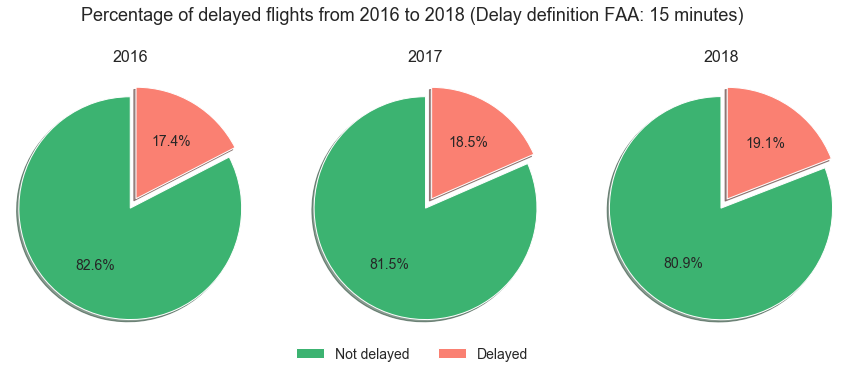

In [18]:
# 3.1.2b Pie charts (Delay definition: 15 minutes according to FAA)
labels = ['Not delayed', 'Delayed']
sizes2016 = df_delay[df_delay['FL_YEAR'] == '2016']['ARR_DELAY_15'].value_counts().values
sizes2017 = df_delay[df_delay['FL_YEAR'] == '2017']['ARR_DELAY_15'].value_counts().values
sizes2018 = df_delay[df_delay['FL_YEAR'] == '2018']['ARR_DELAY_15'].value_counts().values

fig1, (ax1, ax2, ax3) = plt.subplots(1, 3)

ax1.pie(sizes2016, autopct='%1.1f%%', shadow=True, startangle=90, explode=(0, 0.1), colors=['mediumseagreen', 'salmon'], textprops={'fontsize': 14})
ax1.axis('equal')
ax1.set_title('2016', fontsize=16)

ax2.pie(sizes2017, autopct='%1.1f%%', shadow=True, startangle=90, explode=(0, 0.1), colors=['mediumseagreen', 'salmon'], textprops={'fontsize': 14})
ax2.axis('equal')
ax2.set_title('2017', fontsize=16)
ax2.legend(labels=labels, loc='lower left', bbox_to_anchor= (-0.05, -0.1), ncol=2, 
            borderaxespad=0, frameon=False, fontsize=14)

ax3.pie(sizes2018, autopct='%1.1f%%', shadow=True, startangle=90, explode=(0, 0.1), colors=['mediumseagreen', 'salmon'], textprops={'fontsize': 14})
ax3.axis('equal')
ax3.set_title('2018', fontsize=16)


fig1.set_figheight(5)
fig1.set_figwidth(15)
fig1.suptitle('Percentage of delayed flights from 2016 to 2018 (Delay definition FAA: 15 minutes)', fontsize=18, y=1.05)
plt.show()

In [19]:
# Calculating the average delay per year
avg_delay_per_year = []
avg_delay_per_year.append(df[(df['FL_YEAR'] == '2016') & (df['ARR_DELAY'] > 0)]['ARR_DELAY'].mean())
avg_delay_per_year.append(df[(df['FL_YEAR'] == '2017') & (df['ARR_DELAY'] > 0)]['ARR_DELAY'].mean())
avg_delay_per_year.append(df[(df['FL_YEAR'] == '2018') & (df['ARR_DELAY'] > 0)]['ARR_DELAY'].mean())


<a id='anchor_313'></a>

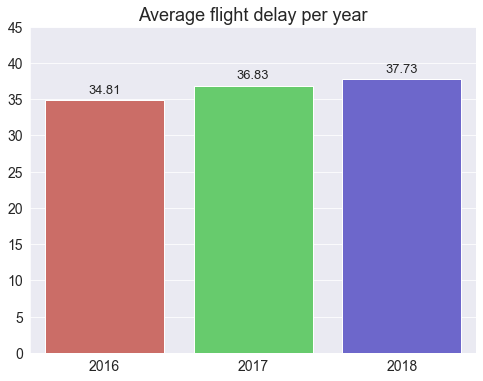

In [20]:
# 3.1.3 Plotting the average delay per year in minutes
sns.set_style("darkgrid")
plt.figure(figsize = (8,6))
plt.title('Average flight delay per year', fontsize=18)
splot=sns.barplot(x=['2016', '2017', '2018'], y=avg_delay_per_year, palette='hls')
plt.ylim(0, 45)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize=13)


<a id='anchor_314'></a>

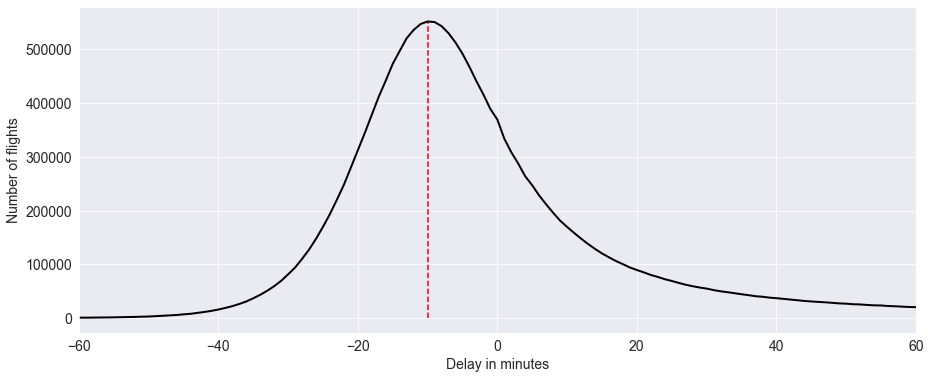

In [21]:
# 3.1.4 Plotting the delay distribution
sns.set_style("darkgrid")
plt.figure(figsize = (15,6))
plt.xlim(-60, 60)
plt.xlabel('Delay in minutes', fontsize=14)
plt.ylabel('Number of flights', fontsize=14)
plt.vlines(x=-10, ymin=0, ymax=df['ARR_DELAY'].value_counts().max(), color='red', linestyles='dashed', zorder=2)
plt.plot(df['ARR_DELAY'].value_counts().sort_index().index, df['ARR_DELAY'].value_counts().sort_index().values, 'k', linewidth=2);


<a id='anchor_315'></a>

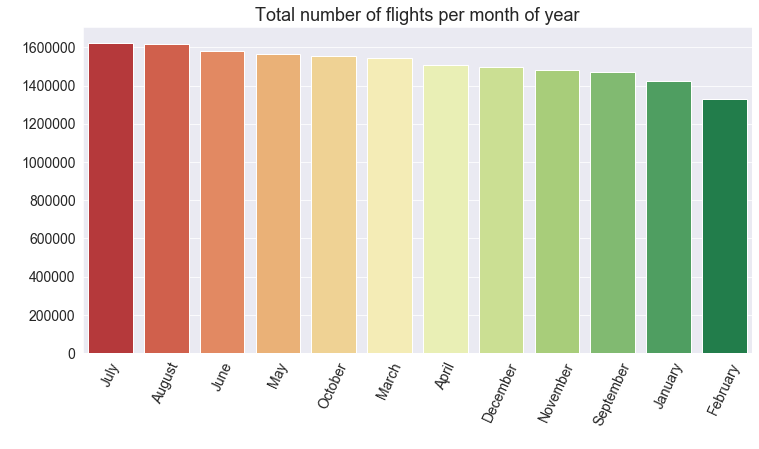

In [22]:
# 3.1.5 Plotting the number of flights per month of year
sns.set_style("darkgrid")
plt.figure(figsize = (12,6))
plt.title('Total number of flights per month of year', fontsize=18)
sns.countplot(x=df_delay['FL_MONTH'], palette="RdYlGn", order=df_delay['FL_MONTH'].value_counts().index)
plt.xticks(rotation=65)
plt.xlabel(' ', fontsize=12)
plt.ylabel(' ', fontsize=12)
rc={'axes.labelsize': 14, 'axes.titlesize': 14, 'xtick.labelsize': 14, 'ytick.labelsize': 14}
plt.rcParams.update(**rc)


<a id='anchor_316'></a>

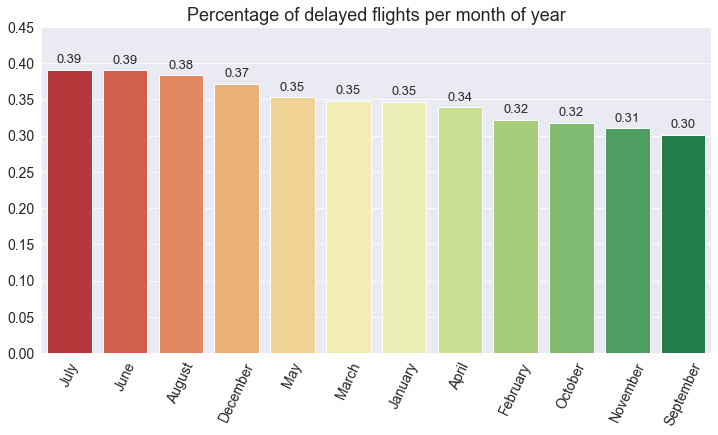

In [23]:
# 3.1.6 Plotting the percentage of delayed flights per month of year
sns.set_style("darkgrid")
plt.figure(figsize = (12,6))
zaehler = df_delay[df_delay['ARR_DELAY_0'] == 1]['FL_MONTH'].value_counts()
nenner = df_delay[df_delay['ARR_DELAY_0'] == 0]['FL_MONTH'].value_counts()
cat = (zaehler/(zaehler+nenner)).sort_values(ascending=False)
splot=sns.barplot(x=cat.index, y=cat.values, palette='RdYlGn')
plt.xticks(rotation=65)
plt.ylim(0.0, 0.45)
plt.title('Percentage of delayed flights per month of year', fontsize=18)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize=13)

In [24]:
# Calculating the average delay per month of year
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
avg_delay_per_month = []
for i in months:
    avg_delay_per_month.append(df[(df['FL_MONTH'] == i) & (df['ARR_DELAY'] > 0)]['ARR_DELAY'].mean())

In [25]:
# Creating delay per month dataframe
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df_delay_month = {'Month':months,'Delay':avg_delay_per_month}
df_delay_month = pd.DataFrame(df_delay_month)
df_delay_month.sort_values(by=['Delay'], inplace=True, ascending=False)


<a id='anchor_317'></a>

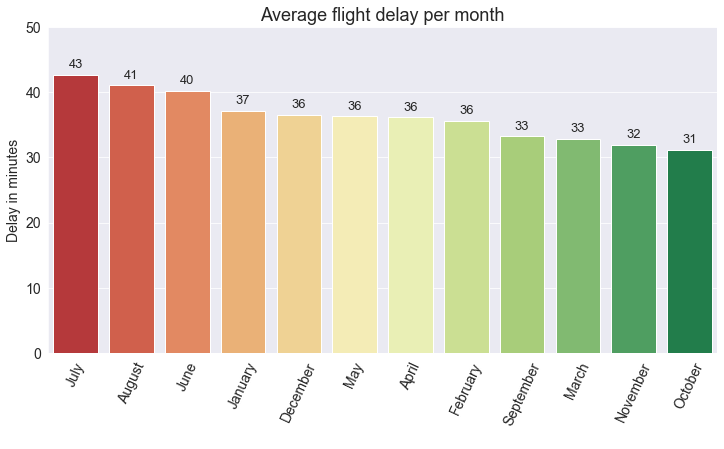

In [26]:
# 3.1.7 Plotting the average delay per month of year in minutes
sns.set_style("darkgrid")
plt.figure(figsize = (12,6))
plt.title('Average flight delay per month', fontsize=18)
splot=sns.barplot(x=df_delay_month['Month'], y=df_delay_month['Delay'], palette='RdYlGn')
plt.xlabel(' ', fontsize=12)
plt.ylabel('Delay in minutes', fontsize=14)
plt.ylim(0, 50)
plt.xticks(rotation=65)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize=13)

In [ ]:
# Flight delay per month combined

In [27]:
# Creating delay per month dataframe
months_combined = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df_delay_month_combined = {'Month':months_combined,'Delay':avg_delay_per_month}
df_delay_month_combined = pd.DataFrame(df_delay_month_combined)

In [28]:
zaehler = df_delay[df_delay['ARR_DELAY_0'] == 1]['FL_MONTH'].value_counts()
nenner = df_delay[df_delay['ARR_DELAY_0'] == 0]['FL_MONTH'].value_counts()
cat = (zaehler/(zaehler+nenner))
cat = cat.reindex(months_combined)

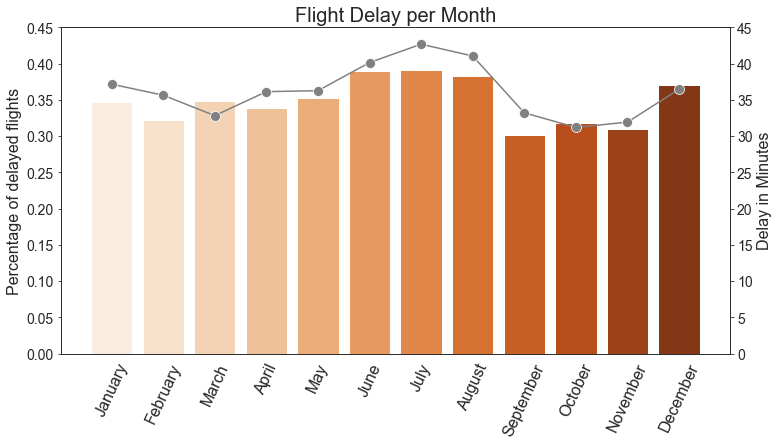

In [29]:
sns.set_style("white")
fig, ax = plt.subplots(figsize=(12,6))
g = sns.barplot(x=cat.index, y=cat.values, palette='Oranges')
plt.ylim(0.0, 0.45)
plt.ylabel('Percentage of delayed flights', fontsize=16)
plt.xticks(rotation=65, fontsize=16)
plt.yticks(fontsize=14)
ax2 = ax.twinx()
splot=sns.lineplot(x=df_delay_month_combined['Month'], y=df_delay_month_combined['Delay'], color = 'gray', ax=ax2, marker='o', markersize=10, sort=False)
plt.ylim(0.0, 45)
plt.yticks(fontsize=14)
plt.ylabel('Delay in Minutes', fontsize=16)
ax.set_title('Flight Delay per Month', fontsize = 20)
plt.show()

In [ ]:
# Preparing data for the Month Delay Probability / Severity Matrix

In [151]:
df_month_delay  = df[['FL_MONTH', 'ARR_DELAY', 'AIRLINE_ID']]

In [152]:
month_list = list(df_month_delay['FL_MONTH'].unique())
month_list.sort()

In [153]:
month_delay_occurency = []
for i in month_list:
    month_delay_occurency.append(len(df_month_delay[(df_month_delay['FL_MONTH'] == i) & (df_month_delay['ARR_DELAY'] > 0)]) / len(df_month_delay[df_month_delay['FL_MONTH'] == i]))

In [154]:
month_delay_severity = []
for i in month_list:
    month_delay_severity.append(df_month_delay[(df_month_delay['ARR_DELAY'] > 0) & (df_month_delay['FL_MONTH'] == i)]['ARR_DELAY'].mean())

In [155]:
df_month_delay_plotting = pd.DataFrame(list(zip(month_list, month_delay_occurency, month_delay_severity)))
df_month_delay_plotting.rename(columns={0:'FL_MONTH', 1:'MONTH_OCCURENCY', 2:'MONTH_SEVERITY'}, inplace=True)
df_month_delay_plotting['MONTH_SCORE'] = df_month_delay_plotting['MONTH_OCCURENCY']*df_month_delay_plotting['MONTH_SEVERITY']

In [156]:
score_delta = (df_month_delay_plotting['MONTH_SCORE'].max() - df_month_delay_plotting['MONTH_SCORE'].min())/3
score_delta2 = df_month_delay_plotting['MONTH_SCORE'].min() + score_delta
score_delta3 = df_month_delay_plotting['MONTH_SCORE'].min() + 2*score_delta

In [157]:
def score_scaler(score):
    if (score < score_delta2):
        return 'green'
    elif (score >= score_delta2) and (score < score_delta3):
        return 'gold'
    else:
        return 'red'

In [158]:
df_month_delay_plotting['MONTH_SCORE_CLASS'] = df_month_delay_plotting['MONTH_SCORE'].apply(score_scaler)

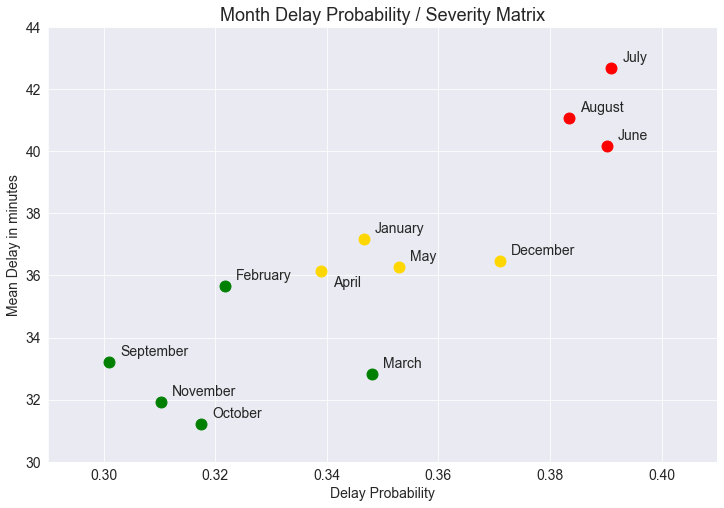

In [163]:
# Plotting the Month Delay Probability / Severity Matrix
types = df_month_delay_plotting['FL_MONTH'].values
colors = df_month_delay_plotting['MONTH_SCORE_CLASS'].values
x_coords = df_month_delay_plotting['MONTH_OCCURENCY'].values
y_coords = df_month_delay_plotting['MONTH_SEVERITY'].values

textpositions = [-0.7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sns.set_style("darkgrid")
plt.figure(figsize = (12,8))
plt.xlim(0.29, 0.41)
plt.ylim(30.0, 44)
plt.xlabel('Delay Probability', fontsize=14);
plt.ylabel('Mean Delay in minutes', fontsize=14);
plt.xticks(size=14)
plt.yticks(size=14)
for i,type in enumerate(types):
    x = x_coords[i]
    y = y_coords[i]
    c = colors[i]
    text_i=textpositions[i]
    plt.scatter(x, y, marker='o', color=c, s=120)
    plt.text(x+0.002, y+0.2+text_i, type, fontsize=14)
plt.title('Month Delay Probability / Severity Matrix', fontsize=18)
plt.show()


<a id='anchor_318'></a>

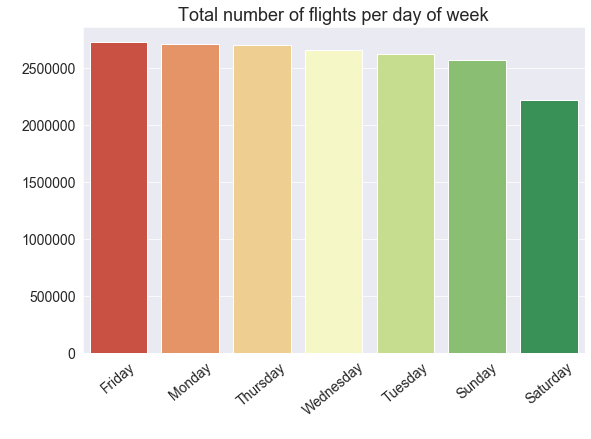

In [39]:
# 3.1.8 Plotting the number of flights per day of week
sns.set_style("darkgrid")
plt.figure(figsize = (9,6))
plt.title('Total number of flights per day of week', fontsize=18)
sns.countplot(x=df_delay['FL_DAYOFWEEK'], palette="RdYlGn", order=df_delay['FL_DAYOFWEEK'].value_counts().index)
plt.xticks(rotation=40)
plt.xlabel(' ', fontsize=12)
plt.ylabel(' ', fontsize=12)
rc={'axes.labelsize': 14, 'axes.titlesize': 14, 'xtick.labelsize': 14, 'ytick.labelsize': 14}
plt.rcParams.update(**rc)


<a id='anchor_319'></a>

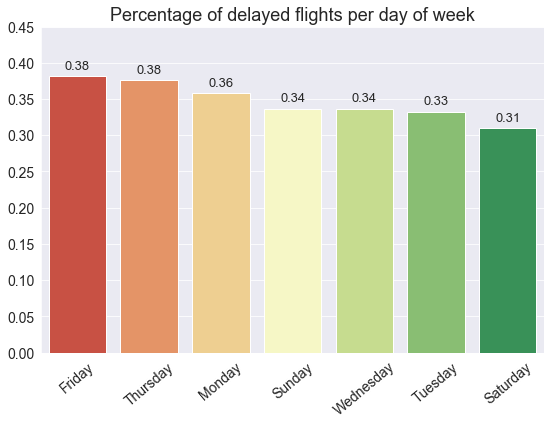

In [40]:
# 3.1.9 Plotting the percentage of delayed flights per day of week
sns.set_style("darkgrid")
plt.figure(figsize = (9,6))
zaehler = df_delay[df_delay['ARR_DELAY_0'] == 1]['FL_DAYOFWEEK'].value_counts()
nenner = df_delay[df_delay['ARR_DELAY_0'] == 0]['FL_DAYOFWEEK'].value_counts()
cat = (zaehler/(zaehler+nenner)).sort_values(ascending=False)
splot=sns.barplot(x=cat.index, y=cat.values, palette='RdYlGn')
plt.xticks(rotation=40)
plt.ylim(0.0, 0.45)
plt.title('Percentage of delayed flights per day of week', fontsize=18)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize=13)

In [41]:
# Calculating the average delay per day of week
dayofweek = [0, 1, 2, 3, 4, 5, 6]
avg_delay_per_weekday = []
for i in dayofweek:
    avg_delay_per_weekday.append(df[(df['FL_DAYOFWEEK'] == i) & (df['ARR_DELAY'] > 0)]['ARR_DELAY'].mean())

In [42]:
# Creating delay per day of week dataframe
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_delay_weekday = {'Weekday':days,'Delay':avg_delay_per_weekday}
df_delay_weekday = pd.DataFrame(df_delay_weekday)
df_delay_weekday.sort_values(by=['Delay'], inplace=True, ascending=False)


<a id='anchor_3110'></a>

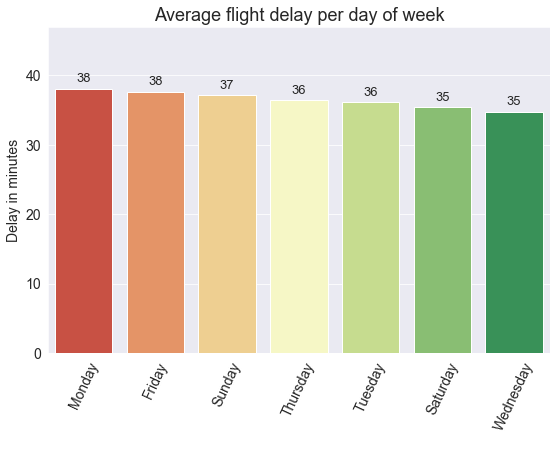

In [43]:
# 3.1.10 Plotting the average delay per day of week in minutes
sns.set_style("darkgrid")
plt.figure(figsize = (9,6))
plt.title('Average flight delay per day of week', fontsize=18)
splot=sns.barplot(x=df_delay_weekday['Weekday'], y=df_delay_weekday['Delay'], palette='RdYlGn')
plt.xlabel(' ', fontsize=12)
plt.ylabel('Delay in minutes', fontsize=14)
plt.ylim(0, 47)
plt.xticks(rotation=65)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize=13)


<a id='anchor_3111'></a>

In [ ]:
# Flight delay per day of week combined

In [44]:
# Creating delay per month dataframe
weekday_combined = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_delay_weekday_combined = {'weekday':weekday_combined,'Delay':avg_delay_per_weekday}
df_delay_weekday_combined = pd.DataFrame(df_delay_weekday_combined)

In [45]:
zaehler = df_delay[df_delay['ARR_DELAY_0'] == 1]['FL_DAYOFWEEK'].value_counts()
nenner = df_delay[df_delay['ARR_DELAY_0'] == 0]['FL_DAYOFWEEK'].value_counts()
cat = (zaehler/(zaehler+nenner))
cat = cat.reindex(weekday_combined)

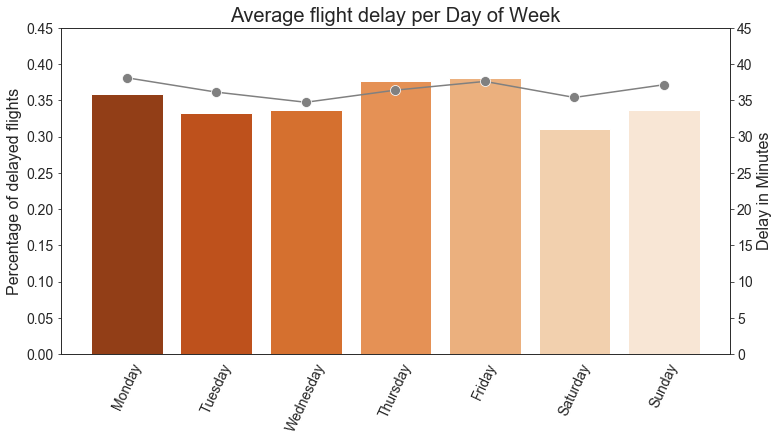

In [46]:
sns.set_style("white")
fig, ax = plt.subplots(figsize=(12,6))
g = sns.barplot(x=cat.index, y=cat.values, palette='Oranges_r')
plt.ylim(0.0, 0.45)
plt.ylabel('Percentage of delayed flights', fontsize=16)
plt.xticks(rotation=65)
plt.yticks(fontsize=14)
ax2 = ax.twinx()
splot=sns.lineplot(x=df_delay_weekday_combined['weekday'], y=df_delay_weekday_combined['Delay'], color = 'gray', ax=ax2, marker='o', markersize=10, sort=False)
plt.ylim(0.0, 45)
plt.yticks(fontsize=14)
plt.ylabel('Delay in Minutes', fontsize=16)
ax.set_title('Average flight delay per Day of Week', fontsize = 20)
plt.show()

In [ ]:
# Preparing data for the Weekday Delay Probability / Severity Matrix

In [137]:
df_weekday_delay  = df[['FL_DAYOFWEEK', 'ARR_DELAY']]
df_weekday_delay.sort_values(by=['FL_DAYOFWEEK'], inplace=True, ascending=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [138]:
df_weekday_delay['FL_DAYOFWEEK'].replace({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [139]:
weekday_list = list(df_weekday_delay['FL_DAYOFWEEK'].unique())
weekday_list

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [140]:
weekday_delay_occurency = []
for i in weekday_list:
    weekday_delay_occurency.append(len(df_weekday_delay[(df_weekday_delay['FL_DAYOFWEEK'] == i) & (df_weekday_delay['ARR_DELAY'] > 0)]) / len(df_weekday_delay[df_weekday_delay['FL_DAYOFWEEK'] == i]))

In [141]:
weekday_delay_severity = []
for i in weekday_list:
    weekday_delay_severity.append(df_weekday_delay[(df_weekday_delay['ARR_DELAY'] > 0) & (df_weekday_delay['FL_DAYOFWEEK'] == i)]['ARR_DELAY'].mean())

In [142]:
df_weekday_delay_plotting = pd.DataFrame(list(zip(weekday_list, weekday_delay_occurency, weekday_delay_severity)))
df_weekday_delay_plotting.rename(columns={0:'FL_DAYOFWEEK', 1:'WEEKDAY_OCCURENCY', 2:'WEEKDAY_SEVERITY'}, inplace=True)
df_weekday_delay_plotting['WEEKDAY_SCORE'] = df_weekday_delay_plotting['WEEKDAY_OCCURENCY']*df_weekday_delay_plotting['WEEKDAY_SEVERITY']

In [143]:
score_delta = (df_weekday_delay_plotting['WEEKDAY_SCORE'].max() - df_weekday_delay_plotting['WEEKDAY_SCORE'].min())/3
score_delta2 = df_weekday_delay_plotting['WEEKDAY_SCORE'].min() + score_delta
score_delta3 = df_weekday_delay_plotting['WEEKDAY_SCORE'].min() + 2*score_delta

In [144]:
def score_scaler(score):
    if (score < score_delta2):
        return 'green'
    elif (score >= score_delta2) and (score < score_delta3):
        return 'gold'
    else:
        return 'red'

In [145]:
df_weekday_delay_plotting['WEEKDAY_SCORE_CLASS'] = df_weekday_delay_plotting['WEEKDAY_SCORE'].apply(score_scaler)

In [146]:
df_weekday_delay_plotting

FL_DAYOFWEEK  WEEKDAY_OCCURENCY  WEEKDAY_SEVERITY  WEEKDAY_SCORE  \
0       Monday           0.358430         38.118313      13.662739   
1      Tuesday           0.332585         36.137487      12.018800   
2    Wednesday           0.336695         34.737883      11.696071   
3     Thursday           0.376449         36.409112      13.706167   
4       Friday           0.381452         37.613672      14.347815   
5     Saturday           0.310235         35.400867      10.982605   
6       Sunday           0.336744         37.154286      12.511470   

  WEEKDAY_SCORE_CLASS  
0                 red  
1               green  
2               green  
3                 red  
4                 red  
5               green  
6                gold

In [147]:
df_weekday_delay_plotting['WEEKDAY_SEVERITY'].values

array([38.11831267, 36.13748667, 34.73788266, 36.40911234, 37.61367184,
       35.40086663, 37.15428591])

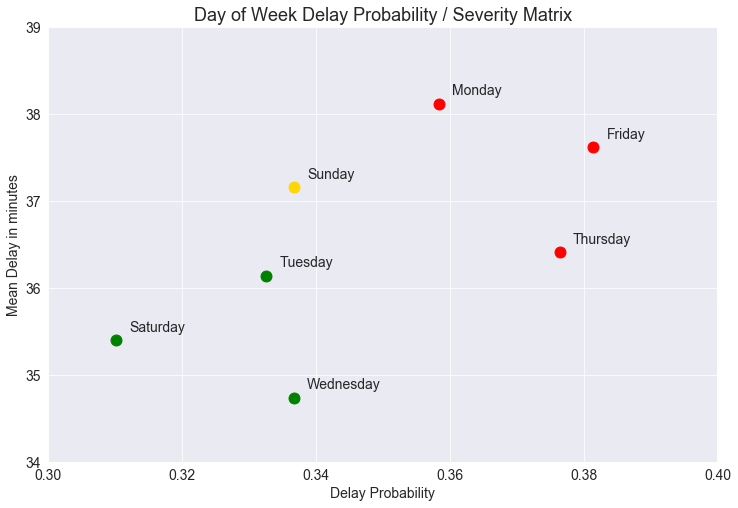

In [149]:
# Plotting the Day of Week Delay Probability / Severity Matrix
types = df_weekday_delay_plotting['FL_DAYOFWEEK'].values
colors = df_weekday_delay_plotting['WEEKDAY_SCORE_CLASS'].values
x_coords = df_weekday_delay_plotting['WEEKDAY_OCCURENCY'].values
y_coords = df_weekday_delay_plotting['WEEKDAY_SEVERITY'].values

textpositions = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sns.set_style("darkgrid")
plt.figure(figsize = (12,8))
plt.xlim(0.3, 0.4)
plt.ylim(34.0, 39)
plt.xlabel('Delay Probability', fontsize=14);
plt.ylabel('Mean Delay in minutes', fontsize=14);
plt.xticks(size=14)
plt.yticks(size=14)
for i,type in enumerate(types):
    x = x_coords[i]
    y = y_coords[i]
    c = colors[i]
    text_i=textpositions[i]
    plt.scatter(x, y, marker='o', color=c, s=120)
    plt.text(x+0.002, y+0.1+text_i, type, fontsize=14)
plt.title('Day of Week Delay Probability / Severity Matrix', fontsize=18)
plt.show()

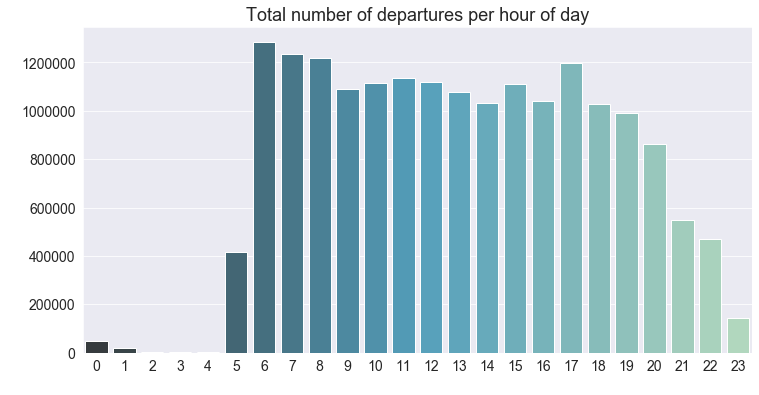

In [59]:
# 3.1.11 Plotting the total number of flights per hour of day
sns.set_style("darkgrid")
plt.figure(figsize = (12,6))
plt.title('Total number of departures per hour of day', fontsize=18)
sns.countplot(x=df_delay['DEP_HOUR_PLANNED'], palette="GnBu_d")
plt.xlabel(' ', fontsize=12)
plt.ylabel(' ', fontsize=12)
rc={'axes.labelsize': 14, 'axes.titlesize': 14, 'xtick.labelsize': 14, 'ytick.labelsize': 14}
plt.rcParams.update(**rc)


<a id='anchor_3112'></a>

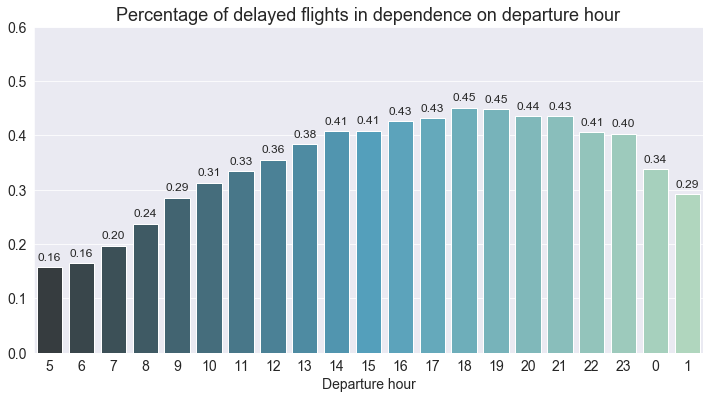

In [60]:
# 3.1.12 Plotting the percentage of delayed flights per hour of day
sns.set_style("darkgrid")
plt.figure(figsize = (12,6))
zaehler = df_delay[df_delay['DEP_DELAY_0'] == 1]['DEP_HOUR_PLANNED'].value_counts()
nenner = df_delay[df_delay['DEP_DELAY_0'] == 0]['DEP_HOUR_PLANNED'].value_counts()
cat = (zaehler/(zaehler+nenner)).sort_values(ascending=False)
splot=sns.barplot(x=cat.index, y=cat.values, palette='GnBu_d', order=[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 0, 1])
plt.ylim(0.0, 0.6)
plt.xlabel('Departure hour', fontsize=14)
plt.title('Percentage of delayed flights in dependence on departure hour', fontsize=18)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize=12)

In [61]:
# Calculating the average delay per month of year
dep_hour_list = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 0, 1]
avg_delay_per_dephour = []
for i in dep_hour_list:
    avg_delay_per_dephour.append(df_delay[(df_delay['DEP_HOUR_PLANNED'] == i) & (df_delay['ARR_DELAY'] > 0)]['ARR_DELAY'].mean())

In [62]:
# Creating delay per weekday dataframe
hours = ['5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '0', '1']
df_delay_weekday = {'Dep_hours':hours,'Delay':avg_delay_per_dephour}
df_delay_weekday = pd.DataFrame(df_delay_weekday)
df_delay_weekday.sort_values(by=['Delay'], inplace=True, ascending=False)


<a id='anchor_3113'></a>

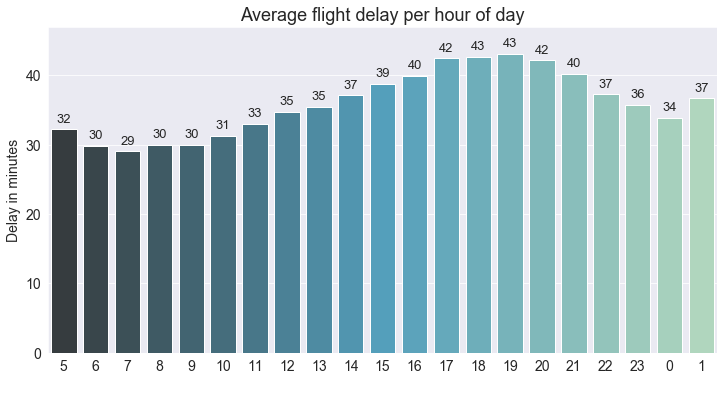

In [63]:
# 3.1.13 Plotting the average delay per hour of day in minutes
sns.set_style("darkgrid")
plt.figure(figsize = (12,6))
plt.title('Average flight delay per hour of day', fontsize=18)
splot=sns.barplot(x=df_delay_weekday['Dep_hours'], y=df_delay_weekday['Delay'], palette='GnBu_d', order=['5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '0', '1'])
plt.xlabel(' ', fontsize=12)
plt.ylabel('Delay in minutes', fontsize=14)
plt.ylim(0, 47)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize=13)

In [ ]:
# Flight delay per month combined

In [64]:
# Creating delay per month dataframe
hours = ['5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '0', '1']
hours_column = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
df_delay_weekday = {'Dep_hours':hours,'Delay':avg_delay_per_dephour}
df_delay_weekday = pd.DataFrame(df_delay_weekday)

In [65]:
zaehler = df_delay[df_delay['DEP_DELAY_0'] == 1]['DEP_HOUR_PLANNED'].value_counts()
nenner = df_delay[df_delay['DEP_DELAY_0'] == 0]['DEP_HOUR_PLANNED'].value_counts()
cat = (zaehler/(zaehler+nenner)).sort_values(ascending=False)

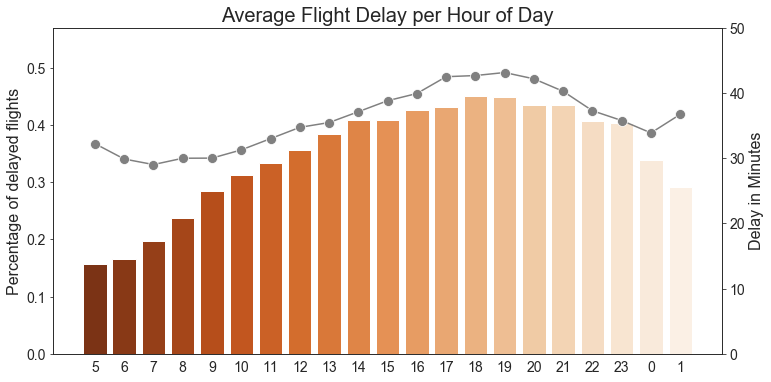

In [66]:
sns.set_style("white")
fig, ax = plt.subplots(figsize=(12,6))
splot=sns.barplot(x=cat.index, y=cat.values, palette='Oranges_r', order=[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 0, 1])
plt.ylim(0.0, 0.57)
plt.ylabel('Percentage of delayed flights', fontsize=16)
plt.yticks(fontsize=14)
ax2 = ax.twinx()
splot=sns.lineplot(x=df_delay_weekday['Dep_hours'], y=df_delay_weekday['Delay'], color='gray', ax=ax2, marker='o', markersize=10, sort=False)
plt.ylim(0.0, 50)
plt.yticks(fontsize=14)
plt.ylabel('Delay in Minutes', fontsize=16)
ax.set_title('Average Flight Delay per Hour of Day', fontsize = 20)
plt.show()


<a id='anchor_32'></a>

### 3.2 Airline Perspective

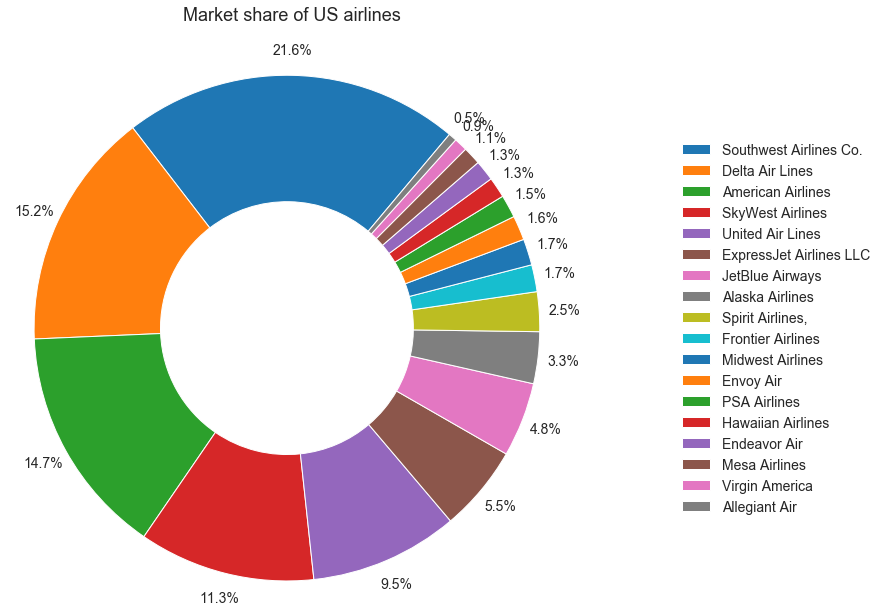

In [67]:
# 3.2.1 Market Share of US airlines
airlines = df['AIRLINE_NAME'].value_counts().values
labels = df['AIRLINE_NAME'].value_counts().index

fig1, (ax1) = plt.subplots(1, 1)

ax1.pie(airlines, wedgeprops=dict(width=0.5), autopct='%1.1f%%', pctdistance=1.1, shadow=False, startangle=50, textprops={'fontsize': 14})
ax1.axis('equal')
#ax1.set_title('Market share of US airlines', fontsize=18)
ax1.legend(labels=labels, loc='center left', bbox_to_anchor= (1.2, 0, 0.5, 1), ncol=1, 
            borderaxespad=0, frameon=False, fontsize=14)

fig1.suptitle('Market share of US airlines', fontsize=18, x=0.52, y=0.95)
fig1.set_figheight(10)
fig1.set_figwidth(10)
plt.show()


<a id='anchor_222'></a>


<a id='anchor_322'></a>

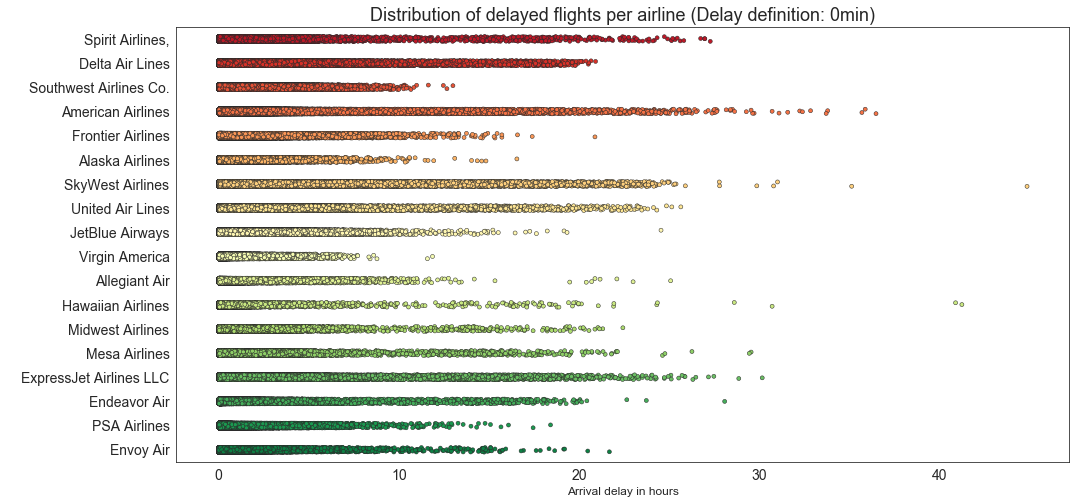

In [68]:
# 3.2.2 Plotting the distribution of delayed flights per airline (Delay definition: 0 minutes)
plt.figure(figsize = (16,8))
X = (df_delay[df_delay['ARR_DELAY_0'] == 1]['ARR_DELAY'] / 60)
Y = df_delay[df_delay['ARR_DELAY_0'] == 1]['AIRLINE_NAME']
sns.stripplot(y=Y, x=X, size = 4, palette = 'RdYlGn', linewidth = 0.5,  jitter=True)
plt.xlabel('Arrival delay in hours', fontsize=12)
plt.ylabel(' ', fontsize=12);
plt.title('Distribution of delayed flights per airline (Delay definition: 0min)', fontsize=18);


<a id='anchor_323'></a>

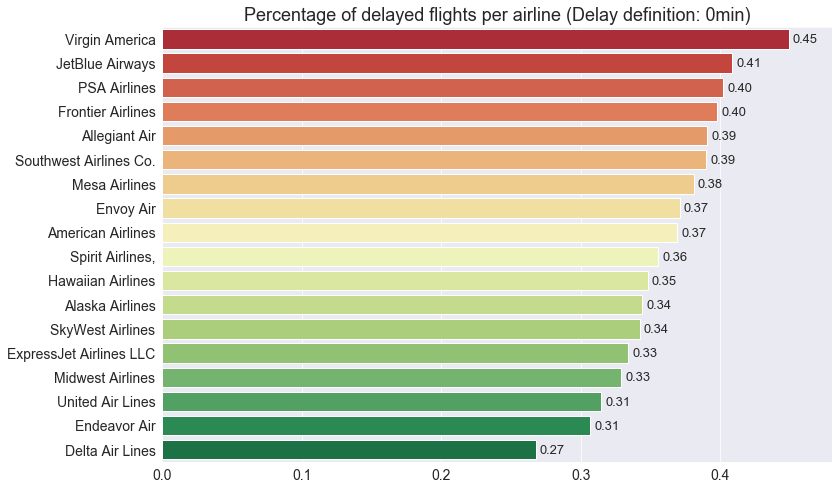

In [69]:
# 3.2.3a Plotting the percentage of delayed flights per airline (Delay definition: 0 minutes)
sns.set_style("darkgrid")
plt.figure(figsize = (12,8))
zaehler = df_delay[df_delay['ARR_DELAY_0'] == 1]['AIRLINE_NAME'].value_counts()
nenner = df_delay[df_delay['ARR_DELAY_0'] == 0]['AIRLINE_NAME'].value_counts()
cat = (zaehler/(zaehler+nenner)).sort_values(ascending=False)
splot=sns.barplot(y=cat.index, x=cat.values, palette='RdYlGn', orient='h')
plt.xlim(0.0, 0.48)
plt.title('Percentage of delayed flights per airline (Delay definition: 0min)', fontsize=18)
for p in splot.patches:
    width = p.get_width()
    plt.text(0.003 + p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='left', va='center', fontsize=13)

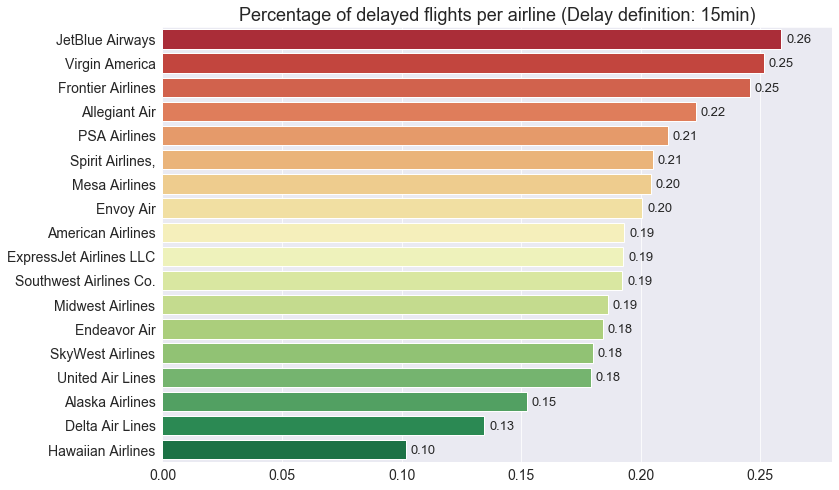

In [70]:
# 3.2.3b Plotting the percentage of delayed flights per airline (Delay definition: 15 minutes according to FAA)
sns.set_style("darkgrid")
plt.figure(figsize = (12,8))
zaehler = df_delay[df_delay['ARR_DELAY_15'] == 1]['AIRLINE_NAME'].value_counts()
nenner = df_delay[df_delay['ARR_DELAY_15'] == 0]['AIRLINE_NAME'].value_counts()
cat = (zaehler/(zaehler+nenner)).sort_values(ascending=False)
splot=sns.barplot(y=cat.index, x=cat.values, palette='RdYlGn', orient='h')
#plt.xticks(rotation=70)
plt.xlim(0.0, 0.28)
plt.title('Percentage of delayed flights per airline (Delay definition: 15min)', fontsize=18)
for p in splot.patches:
    width = p.get_width()
    plt.text(0.002 + p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='left', va='center', fontsize=13)

In [ ]:
# 3.2.4 Plotting the average flight delay per airline

In [71]:
airline_list = list(df['AIRLINE_NAME'].unique())

In [72]:
# Calculating the average delay per month of year
avg_delay_per_airline = []
for i in airline_list:
    avg_delay_per_airline.append(df[(df['AIRLINE_NAME'] == i) & (df['ARR_DELAY'] > 0)]['ARR_DELAY'].mean())

In [73]:
# Creating delay per month dataframe
df_delay_airline = {'Airline':airline_list,'Delay':avg_delay_per_airline}
df_delay_airline = pd.DataFrame(df_delay_airline)
df_delay_airline.sort_values(by=['Delay'], inplace=True, ascending=False)

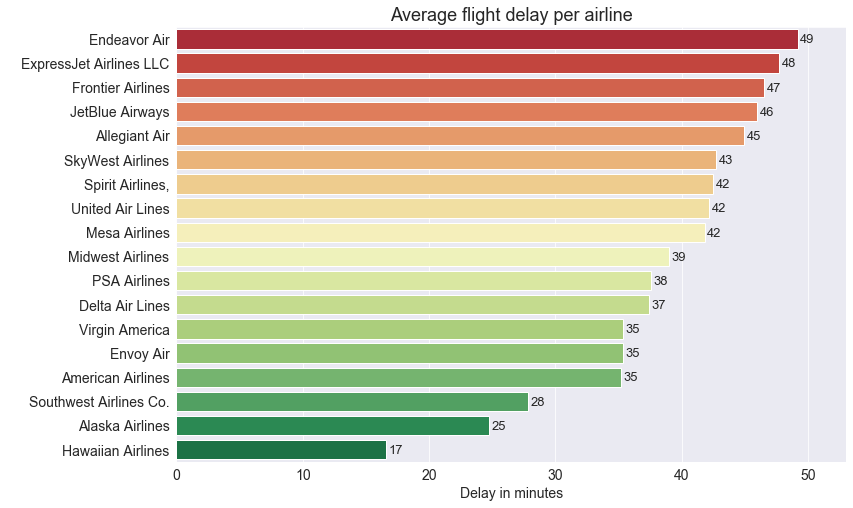

In [74]:
# 3.2.3b Plotting the average delay per airline
sns.set_style("darkgrid")
plt.figure(figsize = (12,8))
splot=sns.barplot(y=df_delay_airline['Airline'], x=df_delay_airline['Delay'], palette='RdYlGn', orient='h')
#plt.xticks(rotation=70)
plt.xlabel('Delay in minutes', fontsize=14)
plt.ylabel(' ', fontsize=12);
plt.xlim(0.0, 53)
plt.title('Average flight delay per airline', fontsize=18)
for p in splot.patches:
    width = p.get_width()
    plt.text(0.2 + p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.0f}'.format(width),
             ha='left', va='center', fontsize=13)


<a id='anchor_324'></a>

In [ ]:
# 3.2.4 Plotting the percentage of delayed flights per airline per year:

For this plot a new dataframe is created with a couple of intermediate steps

In [75]:
airline_list = list(df_delay['AIRLINE_NAME'].unique())
year_list = ['2016', '2017', '2018']

In [76]:
airlines_delayed = []
for i in year_list:
    for j in airline_list:
        airlines_delayed.append((len(df_delay[(df_delay['ARR_DELAY_0'] == 1) & (df_delay['AIRLINE_NAME'] == j) & (df_delay['FL_YEAR'] == i)])))

In [77]:
airlines_complete = []
for i in year_list:
    for j in airline_list:
        airlines_complete.append((len(df_delay[(df_delay['AIRLINE_NAME'] == j) & (df_delay['FL_YEAR'] == i)])))

In [78]:
# Creating a new dataframe for plotting on basis of a couple of lists
airline_list3 = 3*airline_list
year_list18 = (18*year_list)
year_list18.sort()
df_delay_per_airline = pd.DataFrame(list(zip(airline_list3, year_list18, airlines_delayed, airlines_complete)))

In [79]:
df_delay_per_airline['delay_percentage'] = df_delay_per_airline[2]/df_delay_per_airline[3]
df_delay_per_airline['delay_percentage'].fillna(0, inplace=True)

Text(0.5, 1.0, 'Percentage of delayed flights per airline per year (Delay definition: 0 minutes)')

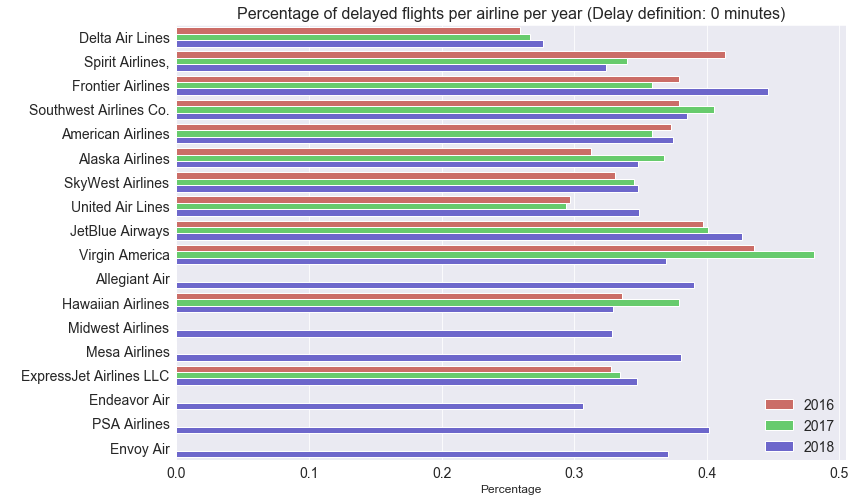

In [80]:
# Plotting the percentage of delayed flights per airline per year(Delay definition: 0 minutes)
plt.figure(figsize = (12,8))
splot=sns.barplot(y=df_delay_per_airline[0], x=df_delay_per_airline['delay_percentage'], hue=df_delay_per_airline[1], palette='hls', orient='h')
plt.legend(loc='lower left', bbox_to_anchor= (0.87, 0, 0.5, 1), ncol=1, borderaxespad=0, frameon=False, fontsize=14)
plt.xlabel('Percentage', fontsize=12)
plt.ylabel(' ', fontsize=12)
plt.title('Percentage of delayed flights per airline per year (Delay definition: 0 minutes)', fontsize=16)

In [ ]:
# Preparing data for the Airline Delay Probability / Severity Matrix

In [81]:
df_airline_delay  = df[['AIRLINE_NAME', 'ARR_DELAY', 'AIRLINE_ID']]

In [82]:
airline_list = list(df_airline_delay['AIRLINE_NAME'].unique())
airline_list.sort()

In [83]:
airline_delay_occurency = []
for i in airline_list:
    airline_delay_occurency.append(len(df_airline_delay[(df_airline_delay['AIRLINE_NAME'] == i) & (df_airline_delay['ARR_DELAY'] > 0)]) / len(df_airline_delay[df_airline_delay['AIRLINE_NAME'] == i]))

In [84]:
airline_delay_severity = []
for i in airline_list:
    airline_delay_severity.append(df_airline_delay[(df_airline_delay['ARR_DELAY'] > 0) & (df_airline_delay['AIRLINE_NAME'] == i)]['ARR_DELAY'].mean())

In [85]:
df_airline_delay_plotting = pd.DataFrame(list(zip(airline_list, airline_delay_occurency, airline_delay_severity)))
df_airline_delay_plotting.rename(columns={0:'AIRLINE_NAME', 1:'AIRLINE_OCCURENCY', 2:'AIRLINE_SEVERITY'}, inplace=True)
df_airline_delay_plotting['AIRLINE_SCORE'] = df_airline_delay_plotting['AIRLINE_OCCURENCY']*df_airline_delay_plotting['AIRLINE_SEVERITY']

In [86]:
score_delta = (df_airline_delay_plotting['AIRLINE_SCORE'].max() - df_airline_delay_plotting['AIRLINE_SCORE'].min())/3
score_delta2 = df_airline_delay_plotting['AIRLINE_SCORE'].min() + score_delta
score_delta3 = df_airline_delay_plotting['AIRLINE_SCORE'].min() + 2*score_delta

In [87]:
def score_scaler(score):
    if (score < score_delta2):
        return 'green'
    elif (score >= score_delta2) and (score < score_delta3):
        return 'gold'
    else:
        return 'red'

In [88]:
df_airline_delay_plotting['AIRLINE_SCORE_CLASS'] = df_airline_delay_plotting['AIRLINE_SCORE'].apply(score_scaler)

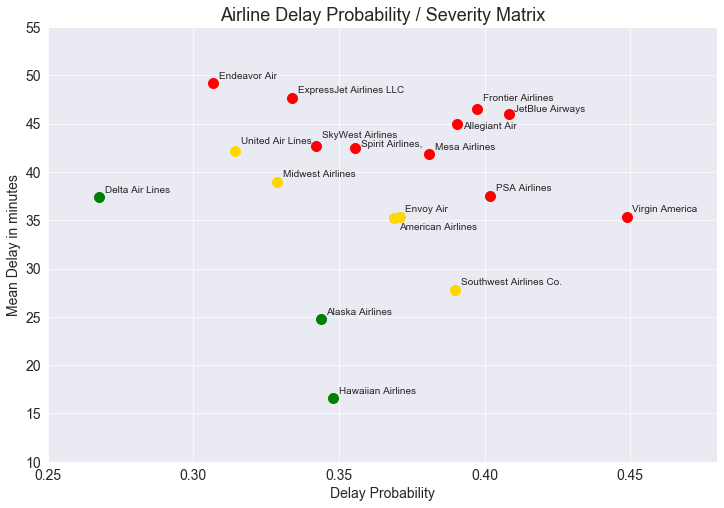

In [134]:
# Plotting the Airline Delay Probability / Severity Matrix
types = df_airline_delay_plotting['AIRLINE_NAME'].values
colors = df_airline_delay_plotting['AIRLINE_SCORE_CLASS'].values
x_coords = df_airline_delay_plotting['AIRLINE_OCCURENCY'].values
y_coords = df_airline_delay_plotting['AIRLINE_SEVERITY'].values

textpositions = [0, -1, -1.7, 0, 0, 0.0, 0, 0.3, 0, -0.3, 0, 0, 0, 0.3, 0, -0.4, 0.3, 0]
sns.set_style("darkgrid")
plt.figure(figsize = (12,8))
plt.xlim(0.25, 0.48)
plt.ylim(10.0, 55)
plt.xlabel('Delay Probability', fontsize=14);
plt.ylabel('Mean Delay in minutes', fontsize=14);
plt.xticks(size=14)
plt.yticks(size=14)
for i,type in enumerate(types):
    x = x_coords[i]
    y = y_coords[i]
    c = colors[i]
    text_i=textpositions[i]
    plt.scatter(x, y, marker='o', color=c, s=100)
    plt.text(x+0.002, y+0.5+text_i, type, fontsize=10)
plt.title('Airline Delay Probability / Severity Matrix', fontsize=18)
plt.show()


<a id='anchor_33'></a>

### 3.3 Airport Perspective

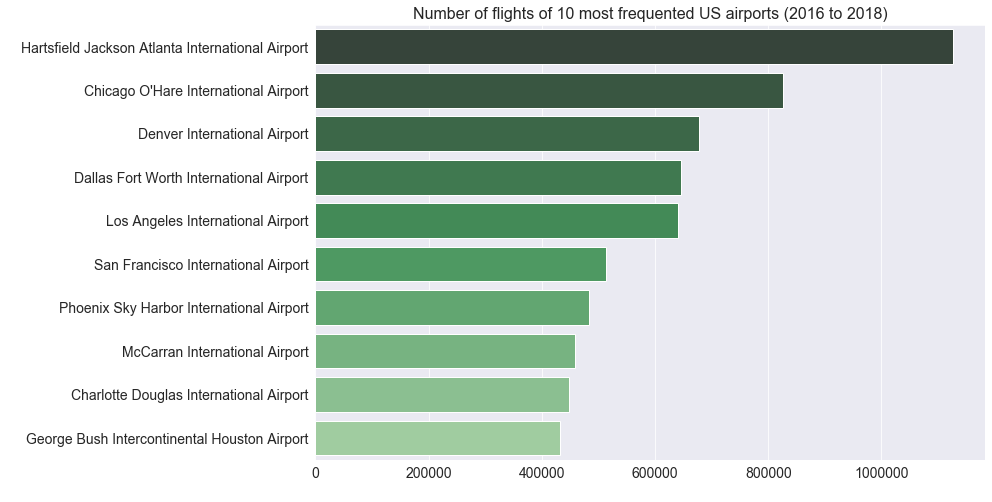

In [90]:
# 3.3.1 Plotting the absolute market share of the 10 most frequented US airports (2016 to 2018)
sns.set_style("darkgrid")
plt.figure(figsize = (12,8))
#splot=sns.barplot(y=cat.index, x=cat.values, palette='Greens_d', orient='h')
splot=sns.countplot(y=df['DEP_AIRPORT_NAME'], palette="Greens_d", orient='h', order=df['DEP_AIRPORT_NAME'].value_counts().iloc[:10].index)
#plt.xticks(rotation=50)
#plt.xlim(0.0, 6.5)
plt.xlabel(' ', fontsize=12)
plt.ylabel(' ', fontsize=12)
plt.title('Number of flights of 10 most frequented US airports (2016 to 2018)', fontsize=16);


<a id='anchor_332'></a>

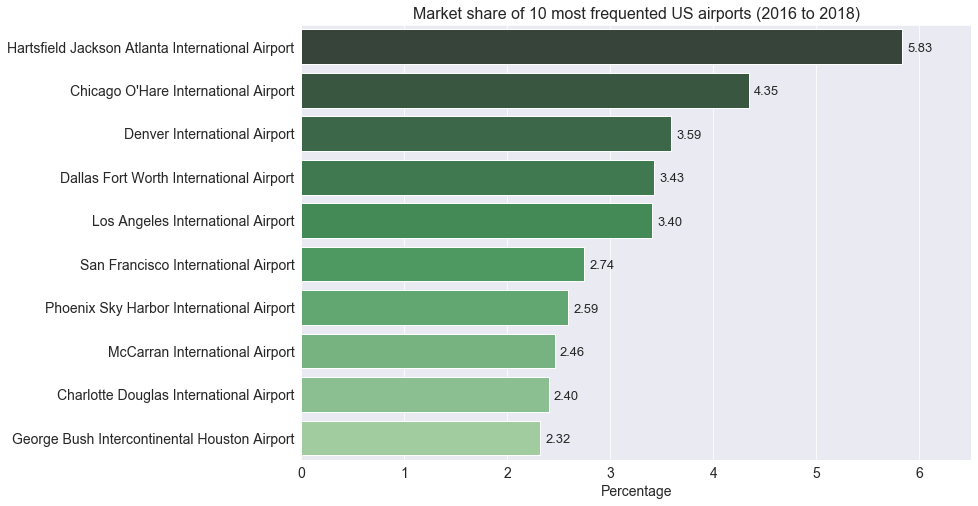

In [91]:
# 3.3.3 Plotting the relative market share of the 10 biggest US airports
sns.set_style("darkgrid")
plt.figure(figsize = (12,8))
zaehler = df['DEP_AIRPORT_NAME'].value_counts().iloc[:10]
nenner = len(df)
cat = (zaehler/(zaehler+nenner)*100).sort_values(ascending=False)
splot=sns.barplot(y=cat.index, x=cat.values, palette='Greens_d', orient='h')
plt.xlim(0.0, 6.5)
plt.xlabel('Percentage', fontsize=14)
plt.title('Market share of 10 most frequented US airports (2016 to 2018)', fontsize=16)
for p in splot.patches:
    width = p.get_width()
    plt.text(0.05 + p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='left', va='center', fontsize=13)


<a id='anchor_333'></a>

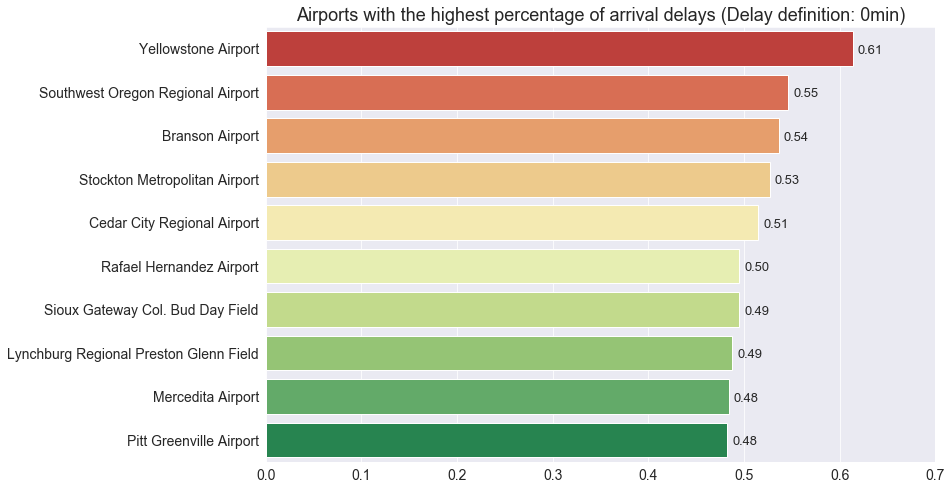

In [92]:
# 3.3.3a Plotting the 10 airports with the highest percentage of arrival delays (Delay definition: 0min)
sns.set_style("darkgrid")
plt.figure(figsize = (12,8))
zaehler = df_delay[df_delay['ARR_DELAY_0'] == 1]['ARR_AIRPORT_NAME'].value_counts()
nenner = df_delay[df_delay['ARR_DELAY_0'] == 0]['ARR_AIRPORT_NAME'].value_counts()
cat = (zaehler/(zaehler+nenner)).sort_values(ascending=False)
splot=sns.barplot(y=cat.index[:10], x=cat.values[:10], palette='RdYlGn', orient='h')
#plt.xticks(rotation=70)
plt.xlim(0.0, 0.7)
plt.title('Airports with the highest percentage of arrival delays (Delay definition: 0min)', fontsize=18)
for p in splot.patches:
    width = p.get_width()
    plt.text(0.005 + p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='left', va='center', fontsize=13)

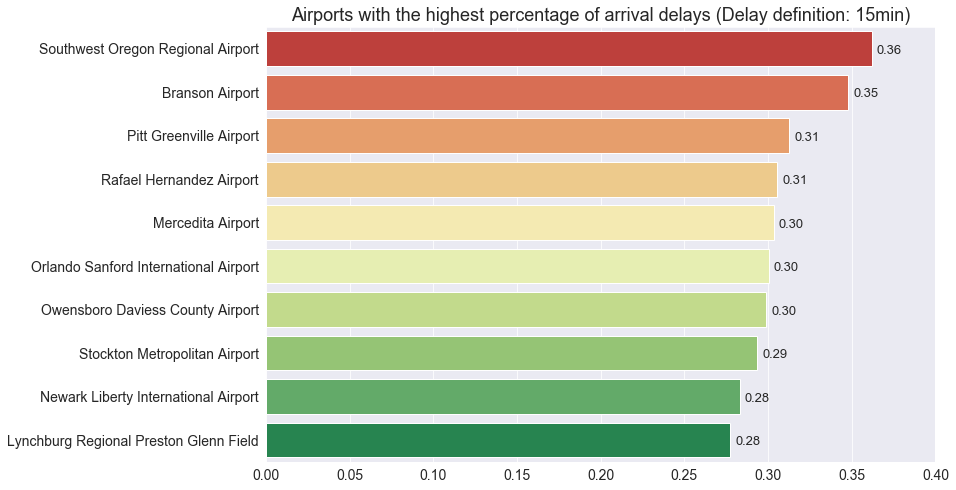

In [93]:
# 3.3.3b Plotting the 10 airports with the highest percentage of arrival delays (Delay definition: 15min)
sns.set_style("darkgrid")
plt.figure(figsize = (12,8))
zaehler = df_delay[df_delay['ARR_DELAY_15'] == 1]['ARR_AIRPORT_NAME'].value_counts()
nenner = df_delay[df_delay['ARR_DELAY_15'] == 0]['ARR_AIRPORT_NAME'].value_counts()
cat = (zaehler/(zaehler+nenner)).sort_values(ascending=False)
splot=sns.barplot(y=cat.index[:10], x=cat.values[:10], palette='RdYlGn', orient='h')
#plt.xticks(rotation=70)
plt.xlim(0.0, 0.4)
plt.title('Airports with the highest percentage of arrival delays (Delay definition: 15min)', fontsize=18)
for p in splot.patches:
    width = p.get_width()
    plt.text(0.003 + p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='left', va='center', fontsize=13)


<a id='anchor_334'></a>

In [ ]:
# 3.3.4 Plotting the 10 airports with the highest average arrival delays


In [ ]:
# 3.3.5 Plotting airport locations on a map

In [ ]:
df_geo_airports.head(3)

| Lower limit | Upper limit | No of flights | Scaler |
| :-: | :-: | :-: | :-: |
| >= 100000 | - | 17 | 1 |
| >= 10000 | < 100000 | 59 | 0.8 |
| >= 1000 | < 10000 | 150 | 0.6 |
| >= 100 | < 1000 | 76 | 0.4 |
| - | < 100 | 56 | 0.2 |

In [94]:
def radius_scaler(no_flights):
    if (no_flights < 100):
        return 0.2
    elif (no_flights >= 100) and (no_flights < 1000):
        return 0.4
    elif (no_flights >= 1000) and (no_flights < 10000):
        return 0.6
    elif (no_flights >= 10000) and (no_flights < 100000):
        return 0.9
    else:
        return 1.3

In [95]:
def color_scaler(percentage_delayed_flights):
    if (percentage_delayed_flights < 0.2):
        return '#1a9641'
    elif (percentage_delayed_flights >= 0.2) and (percentage_delayed_flights < 0.3):
        return '#a6d96a'
    elif (percentage_delayed_flights >= 0.3) and (percentage_delayed_flights < 0.35):
        return 'gold'
    elif (percentage_delayed_flights >= 0.35) and (percentage_delayed_flights < 0.5):
        return '#fdae61'
    else:
        return '#d7191c'

In [96]:
df_geo_airports['flights_scales'] = df_geo_airports['no_of_flights'].apply(radius_scaler)

In [97]:
df_geo_airports['flights_color_scales'] = df_geo_airports['percentage_delayed'].apply(color_scaler)

In [98]:
print(df_geo_airports[(df_geo_airports['percentage_delayed'] >= 0.9)].shape)
print(df_geo_airports[(df_geo_airports['percentage_delayed'] >= 0.8) & (df_geo_airports['percentage_delayed'] < 0.9)].shape)
print(df_geo_airports[(df_geo_airports['percentage_delayed'] >= 0.7) & (df_geo_airports['percentage_delayed'] < 0.8)].shape)
print(df_geo_airports[(df_geo_airports['percentage_delayed'] >= 0.6) & (df_geo_airports['percentage_delayed'] < 0.7)].shape)
print(df_geo_airports[(df_geo_airports['percentage_delayed'] >= 0.5) & (df_geo_airports['percentage_delayed'] < 0.6)].shape)
print(df_geo_airports[(df_geo_airports['percentage_delayed'] >= 0.35) & (df_geo_airports['percentage_delayed'] < 0.5)].shape)
print(df_geo_airports[(df_geo_airports['percentage_delayed'] >= 0.3) & (df_geo_airports['percentage_delayed'] < 0.35)].shape)
print(df_geo_airports[(df_geo_airports['percentage_delayed'] >= 0.2) & (df_geo_airports['percentage_delayed'] < 0.3)].shape)
print(df_geo_airports[(df_geo_airports['percentage_delayed'] >= 0.1) & (df_geo_airports['percentage_delayed'] < 0.2)].shape)
print(df_geo_airports[(df_geo_airports['percentage_delayed'] > 0.0) & (df_geo_airports['percentage_delayed'] < 0.1)].shape)

(2, 11)
(0, 11)
(0, 11)
(2, 11)
(7, 11)
(88, 11)
(138, 11)
(115, 11)
(6, 11)
(0, 11)



<a id='anchor_335'></a>

In [99]:
# Plotting airport locations of all US passenger airports
# Diameter represents number of departures between 2016 and 2018 (the larger the higher)
# Color represents percentage of delayed flights between 2016 and 2018 (green        = <20%
#                                                                       bright green = >=20% to <30%
#                                                                       yellow       = >=30% to <35%
#                                                                       orange       = >=35% to <50%
#                                                                       red          = >50%)

some_map = folium.Map(location=[df_geo_airports['DEP_LAT'].mean(), 
                                df_geo_airports['DEP_LONG'].mean()], 
                      zoom_start=5)

for i in range(0,len(df_geo_airports)):
   folium.Circle(location=[df_geo_airports.iloc[i]['DEP_LAT'], df_geo_airports.iloc[i]['DEP_LONG']], popup=df_geo_airports.iloc[i]['DEP_AIRPORT_NAME'], radius=df_geo_airports.iloc[i]['flights_scales']*15000,
                 color=df_geo_airports.iloc[i]['flights_color_scales'], fill=True, fill_color=df_geo_airports.iloc[i]['flights_color_scales']).add_to(some_map)    

folium.TileLayer('cartodbpositron').add_to(some_map)
some_map


<a id='anchor_34'></a>

### 3.4 Flight Route Perspective

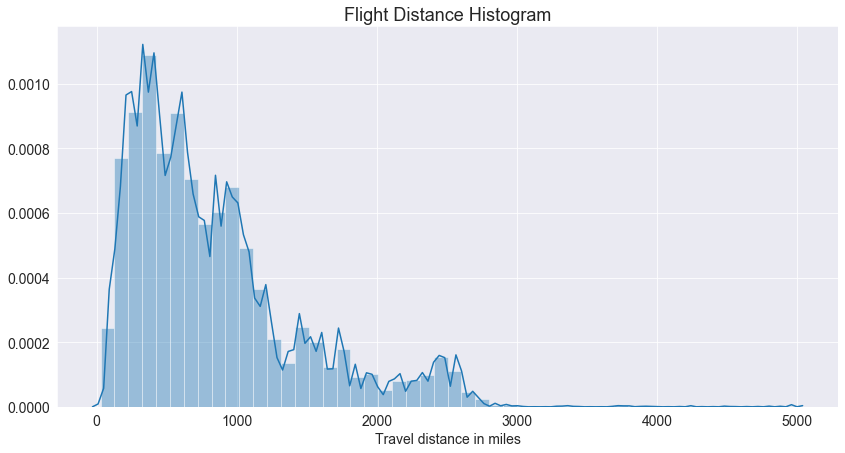

In [100]:
# 3.4.1 Histogram of the flight distance
sns.set_style("darkgrid")
plt.figure(figsize = (14,7))
#plt.xlim(-50, 3200)
plt.title('Flight Distance Histogram', fontsize=18)
ax = sns.distplot(df['DISTANCE'])
plt.xlabel('Travel distance in miles', fontsize=14);


<a id='anchor_342'></a>

In [101]:
# 3.4.2 Plotting the flights routes of all flights between 2016 and 2018
some_map = folium.Map(location=[df_geo_airports['DEP_LAT'].mean(), 
                                df_geo_airports['DEP_LONG'].mean()], 
                      zoom_start=5)

for i in range(0,len(df_geo_airports)):
   folium.Circle(location=[df_geo_airports.iloc[i]['DEP_LAT'], df_geo_airports.iloc[i]['DEP_LONG']], popup=df_geo_airports.iloc[i]['DEP_AIRPORT_NAME'], radius=df_geo_airports.iloc[i]['flights_scales']*15000,
                 color=df_geo_airports.iloc[i]['flights_color_scales'], fill=True, fill_color=df_geo_airports.iloc[i]['flights_color_scales']).add_to(some_map)    


for i in range(0,len(df_flightroutes)):
    a = df_flightroutes.iloc[i:i+1]
    folium.PolyLine(locations=[[float(a['DEP_LAT'].values), float(a['DEP_LONG'].values)],[float(a['ARR_LAT'].values), float(a['ARR_LONG'].values)]], color='steelblue', weight=0.7, opacity=0.3).add_to(some_map)
    
    
folium.TileLayer('cartodbpositron').add_to(some_map)
some_map


<a id='anchor_343'></a>

In [102]:
# 3.4.3 Plotting the Top 10 flights routes of all flights between 2016 and 2018
some_map = folium.Map(location=[df_geo_airports['DEP_LAT'].mean(), 
                                df_geo_airports['DEP_LONG'].mean()], 
                      zoom_start=5)

for i in range(0,len(df_geo_airports)):
   folium.Circle(location=[df_geo_airports.iloc[i]['DEP_LAT'], df_geo_airports.iloc[i]['DEP_LONG']], popup=df_geo_airports.iloc[i]['DEP_AIRPORT_NAME'], radius=df_geo_airports.iloc[i]['flights_scales']*15000,
                 color=df_geo_airports.iloc[i]['flights_color_scales'], fill=True, fill_color=df_geo_airports.iloc[i]['flights_color_scales']).add_to(some_map)    

color_palette = ['black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black']
for i in range(0,len(df_flightroutes_top10)):
    a = df_flightroutes_top10.iloc[i:i+1]
    folium.PolyLine(locations=[[float(a['DEP_LAT'].values), float(a['DEP_LONG'].values)],[float(a['ARR_LAT'].values), float(a['ARR_LONG'].values)]], color=color_palette[i], weight=2.5, opacity=0.8).add_to(some_map)
    
    
folium.TileLayer('cartodbpositron').add_to(some_map)
some_map


<a id='anchor_344'></a>

In [103]:
# 3.4.4 Plotting the Top 10 flights routes with highest delay score of all flights between 2016 and 2018 (Min no. of flights per year per airport: 50)
some_map = folium.Map(location=[df_geo_airports['DEP_LAT'].mean(), 
                                df_geo_airports['DEP_LONG'].mean()], 
                      zoom_start=5)

for i in range(0,len(df_geo_airports)):
   folium.Circle(location=[df_geo_airports.iloc[i]['DEP_LAT'], df_geo_airports.iloc[i]['DEP_LONG']], popup=df_geo_airports.iloc[i]['DEP_AIRPORT_NAME'], radius=df_geo_airports.iloc[i]['flights_scales']*15000,
                 color=df_geo_airports.iloc[i]['flights_color_scales'], fill=True, fill_color=df_geo_airports.iloc[i]['flights_color_scales']).add_to(some_map)    

color_palette = ['black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black']
for i in range(0,len(df_flightroutes_top10_delay_Score)):
    a = df_flightroutes_top10_delay_Score.iloc[i:i+1]
    folium.PolyLine(locations=[[float(a['DEP_LAT'].values), float(a['DEP_LONG'].values)],[float(a['ARR_LAT'].values), float(a['ARR_LONG'].values)]], color=color_palette[i], weight=2.5, opacity=0.8).add_to(some_map)
    
    
folium.TileLayer('cartodbpositron').add_to(some_map)
some_map


<a id='anchor_35'></a>

### 3.5 Reasons for Delay

In [106]:
delay_reasons_list = ['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']
delay_sums = []
for i in delay_reasons_list:
    delay_sums.append(df_delay_reasons_only[i].sum())

In [107]:
delay_sums_array = np.array(delay_sums)
delay_sums_array_percentage = delay_sums_array/delay_sums_array.sum()

In [108]:
delay_sums_percentage = list(delay_sums_array_percentage)


<a id='anchor_351'></a>

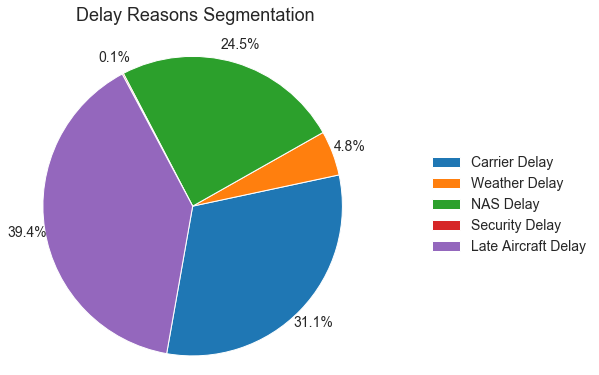

In [109]:
# 3.5.1 Delay Reasons Segmentation

fig1, (ax1) = plt.subplots(1, 1)

ax1.pie(delay_sums_percentage, autopct='%1.1f%%', pctdistance=1.12,shadow=False, startangle=-100, textprops={'fontsize': 14})
ax1.axis('equal')
#ax1.set_title('Market share of US airlines', fontsize=18)
ax1.legend(labels=['Carrier Delay', 'Weather Delay', 'NAS Delay', 'Security Delay', 'Late Aircraft Delay'], loc='center left', bbox_to_anchor= (1.2, 0, 0.5, 1), ncol=1, 
            borderaxespad=0, frameon=False, fontsize=14)

fig1.suptitle('Delay Reasons Segmentation', fontsize=18, x=0.52, y=0.96)
fig1.set_figheight(6)
fig1.set_figwidth(6)
plt.show()

In [ ]:
# Creating necessary Data for Delay Reasons Matrix

In [110]:
def normalizer(x):
    normalized_list = []
    for i in x:
        normalized_list.append((i-min(x))/(max(x)-min(x)))
    return normalized_list

In [111]:
delay_reasons_occurency = []
delay_reasons_occurency.append(len(df_delay_reasons_only[df_delay_reasons_only['CARRIER_DELAY'] > 0]))
delay_reasons_occurency.append(len(df_delay_reasons_only[df_delay_reasons_only['WEATHER_DELAY'] > 0]))
delay_reasons_occurency.append(len(df_delay_reasons_only[df_delay_reasons_only['NAS_DELAY'] > 0]))
delay_reasons_occurency.append(len(df_delay_reasons_only[df_delay_reasons_only['SECURITY_DELAY'] > 0]))
delay_reasons_occurency.append(len(df_delay_reasons_only[df_delay_reasons_only['LATE_AIRCRAFT_DELAY'] > 0]))

In [112]:
delay_reasons_occurency_normalized = normalizer(delay_reasons_occurency)

In [113]:
delay_reasons_severity = []
delay_reasons_severity.append(df_delay_reasons_only[df_delay_reasons_only['CARRIER_DELAY'] > 0]['CARRIER_DELAY'].mean())
delay_reasons_severity.append(df_delay_reasons_only[df_delay_reasons_only['WEATHER_DELAY'] > 0]['WEATHER_DELAY'].mean())
delay_reasons_severity.append(df_delay_reasons_only[df_delay_reasons_only['NAS_DELAY'] > 0]['NAS_DELAY'].mean())
delay_reasons_severity.append(df_delay_reasons_only[df_delay_reasons_only['SECURITY_DELAY'] > 0]['SECURITY_DELAY'].mean())
delay_reasons_severity.append(df_delay_reasons_only[df_delay_reasons_only['LATE_AIRCRAFT_DELAY'] > 0]['LATE_AIRCRAFT_DELAY'].mean())

In [114]:
delay_reasons_severity_normalized = normalizer(delay_reasons_severity)


<a id='anchor_352'></a>

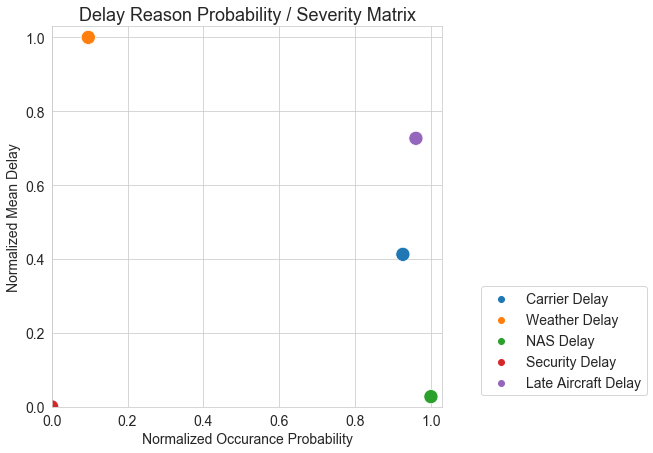

In [115]:
# 3.5.2 Plotting the Delay Reasons Matrix
plt.figure(figsize = (7,7))
#plt.xticks(rotation=70)
plt.xlim(-0.0, 1.03)
plt.ylim(-0.0, 1.03)
plt.xlabel('Normalized Occurance Probability', fontsize=14);
plt.ylabel('Normalized Mean Delay', fontsize=14);
plt.title('Delay Reason Probability / Severity Matrix', fontsize=18)
sns.scatterplot(x=delay_reasons_occurency_normalized, y=delay_reasons_severity_normalized, s=200, hue=['Carrier Delay', 'Weather Delay', 'NAS Delay', 'Security Delay', 'Late Aircraft Delay'])
plt.legend(loc='lower left', bbox_to_anchor= (1.1, 0.03,0,1.2), ncol=1, borderaxespad=0, frameon=True, fontsize=14);


<a id='anchor_353'></a>

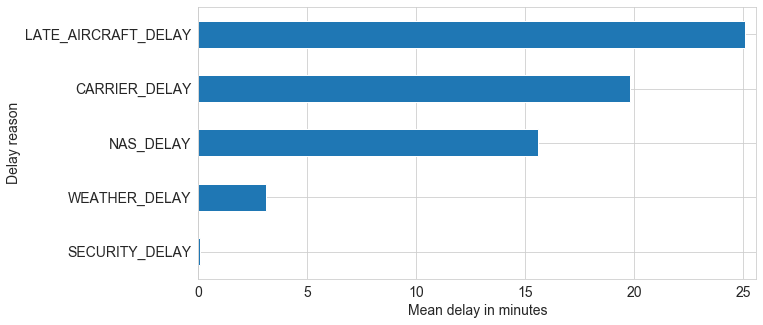

In [105]:
# 3.5.3 Plotting the Mean Delay for each Delay Reason
sns.set_style("darkgrid")
df_delay_reasons_only = df_delay_reasons.copy()
df_delay_reasons_only.drop(columns=['DEP_DELAY', 'ARR_DELAY'], inplace=True)
sns.set_style("whitegrid")
plt.figure(figsize = (10, 5))
fig = df_delay_reasons_only.mean().sort_values(ascending=True).plot(kind='barh')
plt.margins(0.02)
plt.ylabel('Delay reason')
plt.xlabel('Mean delay in minutes')
plt.show()


<a id='anchor_354'></a>

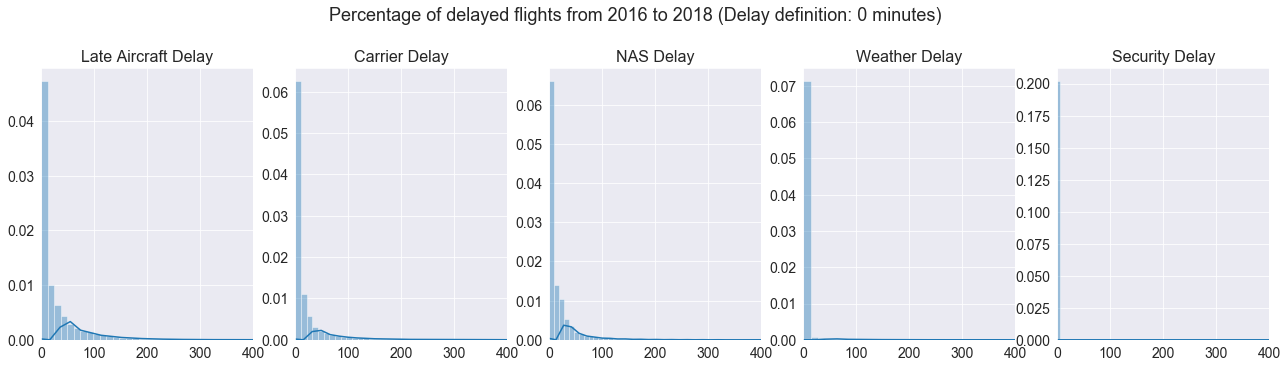

In [116]:
# 3.5.4 Ploting the Histograms for Delay Reasons
sns.set_style("darkgrid")
fig1, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5)

sns.distplot(df_delay_reasons['LATE_AIRCRAFT_DELAY'], ax=ax1, bins=200)
ax1.set_title('Late Aircraft Delay', fontsize=16)
ax1.set_xlim([0, 400])
ax1.set_xlabel(' ')

sns.distplot(df_delay_reasons['CARRIER_DELAY'], ax=ax2, bins=200)
ax2.set_title('Carrier Delay', fontsize=16)
ax2.set_xlim([0, 400])
ax2.set_xlabel(' ')

sns.distplot(df_delay_reasons['NAS_DELAY'], ax=ax3, bins=200)
ax3.set_title('NAS Delay', fontsize=16)
ax3.set_xlim([0, 400])
ax3.set_xlabel(' ')

sns.distplot(df_delay_reasons['WEATHER_DELAY'], ax=ax4, bins=200)
ax4.set_title('Weather Delay', fontsize=16)
ax4.set_xlim([0, 400])
ax4.set_xlabel(' ')

sns.distplot(df_delay_reasons['SECURITY_DELAY'], ax=ax5, bins=200)
ax5.set_title('Security Delay', fontsize=16)
ax5.set_xlim([0, 400])
ax5.set_xlabel(' ')

fig1.set_figheight(5)
fig1.set_figwidth(22)
fig1.suptitle('Percentage of delayed flights from 2016 to 2018 (Delay definition: 0 minutes)', fontsize=18, y=1.05)
plt.show()


<a id='anchor_355'></a>

<b>3.5.5 Extreme Weather Example: Hurricane Irma</b>

In [164]:
Irma_dates = ['2017-09-06', '2017-09-07', '2017-09-08', '2017-09-09', '2017-09-10', '2017-09-11', '2017-09-12', '2017-09-13', '2017-09-14', '2017-09-15', '2017-09-16']

In [165]:
# Impact of Hurricane Irma on number of flights performed at Miami International Airport
no_flights_MIA_Irma = []
for i in Irma_dates:
    no_flights_MIA_Irma.append(len(df[((df['DEP_AIRPORT'] == 'MIA') | (df['ARR_AIRPORT'] == 'MIA')) & (df['FL_DATE'] == i)]))

In [166]:
# Impact of Hurricane Irma on number of flights performed at Tampa International Airport
no_flights_TPA_Irma = []
for i in Irma_dates:
    no_flights_TPA_Irma.append(len(df[((df['DEP_AIRPORT'] == 'TPA') | (df['ARR_AIRPORT'] == 'TPA')) & (df['FL_DATE'] == i)]))

In [167]:
# Impact of Hurricane Irma on number of flights performed at Orlando International Airport
no_flights_MCO_Irma = []
for i in Irma_dates:
    no_flights_MCO_Irma.append(len(df[((df['DEP_AIRPORT'] == 'MCO') | (df['ARR_AIRPORT'] == 'MCO')) & (df['FL_DATE'] == i)]))

In [168]:
df_irma = {'Date':Irma_dates, 'No_Flights_MIA':no_flights_MIA_Irma, 'No_Flights_TPA':no_flights_TPA_Irma, 'No_Flights_MCO':no_flights_MCO_Irma}

In [169]:
df_irma = pd.DataFrame(df_irma)

In [170]:
df_irma

Date  No_Flights_MIA  No_Flights_TPA  No_Flights_MCO
0   2017-09-06             286             309             586
1   2017-09-07             244             319             588
2   2017-09-08              91             306             586
3   2017-09-09               0             180             295
4   2017-09-10               0               0               0
5   2017-09-11               1               0               0
6   2017-09-12             143              62             228
7   2017-09-13             168             198             499
8   2017-09-14             236             300             586
9   2017-09-15             251             311             613
10  2017-09-16             236             276             626

Text(0, 0.5, 'Number of flights')

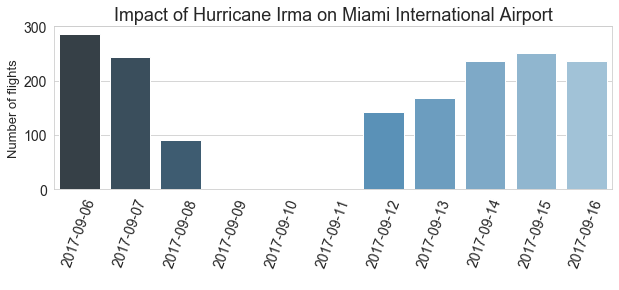

In [171]:
# 3.1.1 Plotting the impact of Hurricane Irma on number of flights performed at Miami International Airport
sns.set_style("whitegrid")
plt.figure(figsize = (10,3))
plt.title('Impact of Hurricane Irma on Miami International Airport', fontsize=18)
sns.barplot(x=df_irma['Date'], y=df_irma['No_Flights_MIA'], palette='Blues_d')
plt.xticks(rotation=70)
plt.xlabel(' ', fontsize=12)
plt.ylabel('Number of flights', fontsize=13)

Text(0, 0.5, 'Number of flights')

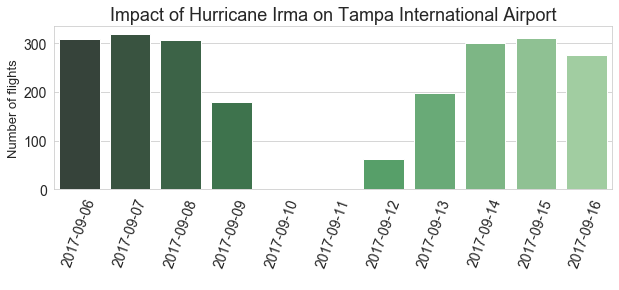

In [172]:
# 3.1.1 Plotting the impact of Hurricane Irma on number of flights performed at Tampa International Airport
plt.figure(figsize = (10,3))
plt.title('Impact of Hurricane Irma on Tampa International Airport', fontsize=18)
sns.barplot(x=df_irma['Date'], y=df_irma['No_Flights_TPA'], palette='Greens_d')
plt.xticks(rotation=70)
plt.xlabel(' ', fontsize=12)
plt.ylabel('Number of flights', fontsize=13)

Text(0, 0.5, 'Number of flights')

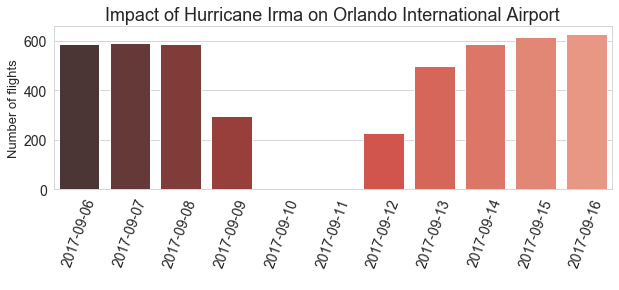

In [173]:
# 3.1.1 Plotting the impact of Hurricane Irma on number of flights performed at Orlando International Airport
plt.figure(figsize = (10,3))
plt.title('Impact of Hurricane Irma on Orlando International Airport', fontsize=18)
sns.barplot(x=df_irma['Date'], y=df_irma['No_Flights_MCO'], palette='Reds_d')
plt.xticks(rotation=70)
plt.xlabel(' ', fontsize=12)
plt.ylabel('Number of flights', fontsize=13)

Impact of Hurricane Irma on flight routes:

In [ ]:
df_flightroutes_irma = df[['FL_DATE', 'FLIGHTROUTE', 'DEP_LAT', 'DEP_LONG', 'ARR_LAT', 'ARR_LONG']]

In [ ]:
df_flightroutes_irma_05 = df_flightroutes_irma[df_flightroutes_irma['FL_DATE'] == '2017-09-05']
df_flightroutes_irma_06 = df_flightroutes_irma[df_flightroutes_irma['FL_DATE'] == '2017-09-06']
df_flightroutes_irma_07 = df_flightroutes_irma[df_flightroutes_irma['FL_DATE'] == '2017-09-07']
df_flightroutes_irma_08 = df_flightroutes_irma[df_flightroutes_irma['FL_DATE'] == '2017-09-08']
df_flightroutes_irma_09 = df_flightroutes_irma[df_flightroutes_irma['FL_DATE'] == '2017-09-09']
df_flightroutes_irma_10 = df_flightroutes_irma[df_flightroutes_irma['FL_DATE'] == '2017-09-10']
df_flightroutes_irma_11 = df_flightroutes_irma[df_flightroutes_irma['FL_DATE'] == '2017-09-11']
df_flightroutes_irma_12 = df_flightroutes_irma[df_flightroutes_irma['FL_DATE'] == '2017-09-12']
df_flightroutes_irma_13 = df_flightroutes_irma[df_flightroutes_irma['FL_DATE'] == '2017-09-13']

In [ ]:
df_flightroutes_irma_05 = df_flightroutes_irma_05.drop_duplicates(subset='FLIGHTROUTE', keep='first')
df_flightroutes_irma_06 = df_flightroutes_irma_06.drop_duplicates(subset='FLIGHTROUTE', keep='first')
df_flightroutes_irma_07 = df_flightroutes_irma_07.drop_duplicates(subset='FLIGHTROUTE', keep='first')
df_flightroutes_irma_08 = df_flightroutes_irma_08.drop_duplicates(subset='FLIGHTROUTE', keep='first')
df_flightroutes_irma_09 = df_flightroutes_irma_09.drop_duplicates(subset='FLIGHTROUTE', keep='first')
df_flightroutes_irma_10 = df_flightroutes_irma_10.drop_duplicates(subset='FLIGHTROUTE', keep='first')
df_flightroutes_irma_11 = df_flightroutes_irma_11.drop_duplicates(subset='FLIGHTROUTE', keep='first')
df_flightroutes_irma_12 = df_flightroutes_irma_12.drop_duplicates(subset='FLIGHTROUTE', keep='first')
df_flightroutes_irma_13 = df_flightroutes_irma_13.drop_duplicates(subset='FLIGHTROUTE', keep='first')

In [ ]:
df_geo_airports['DEP_LONG'].mean()

In [ ]:
# Plotting the flights routes of all flights between 2016 and 2018
some_map = folium.Map(location=[30, -82], zoom_start=5)

for i in range(0,len(df_geo_airports)):
   folium.Circle(location=[df_geo_airports.iloc[i]['DEP_LAT'], df_geo_airports.iloc[i]['DEP_LONG']], popup=df_geo_airports.iloc[i]['DEP_AIRPORT_NAME'], radius=df_geo_airports.iloc[i]['flights_scales']*15000,
                 color=df_geo_airports.iloc[i]['flights_color_scales'], fill=True, fill_color=df_geo_airports.iloc[i]['flights_color_scales']).add_to(some_map)    

for i in range(0,len(df_flightroutes_irma_05)):
    a = df_flightroutes_irma_05.iloc[i:i+1]
    folium.PolyLine(locations=[[float(a['DEP_LAT'].values), float(a['DEP_LONG'].values)],[float(a['ARR_LAT'].values), float(a['ARR_LONG'].values)]], color='steelblue', weight=0.7, opacity=0.3).add_to(some_map)

folium.Circle(location=[16.7, -57.7], popup='Hurricane Irma', radius=200000,
                 color='black', fill=True, fill_color='black').add_to(some_map)
    
folium.TileLayer('cartodbpositron').add_to(some_map)
some_map

In [ ]:
# Plotting the flights routes of all flights between 2016 and 2018
some_map = folium.Map(location=[30, -82], zoom_start=5)

for i in range(0,len(df_geo_airports)):
   folium.Circle(location=[df_geo_airports.iloc[i]['DEP_LAT'], df_geo_airports.iloc[i]['DEP_LONG']], popup=df_geo_airports.iloc[i]['DEP_AIRPORT_NAME'], radius=df_geo_airports.iloc[i]['flights_scales']*15000,
                 color=df_geo_airports.iloc[i]['flights_color_scales'], fill=True, fill_color=df_geo_airports.iloc[i]['flights_color_scales']).add_to(some_map)    

for i in range(0,len(df_flightroutes_irma_06)):
    a = df_flightroutes_irma_06.iloc[i:i+1]
    folium.PolyLine(locations=[[float(a['DEP_LAT'].values), float(a['DEP_LONG'].values)],[float(a['ARR_LAT'].values), float(a['ARR_LONG'].values)]], color='steelblue', weight=0.7, opacity=0.3).add_to(some_map)

folium.Circle(location=[18.1, -63.3], popup='Hurricane Irma', radius=200000,
                 color='black', fill=True, fill_color='black').add_to(some_map)
    
folium.TileLayer('cartodbpositron').add_to(some_map)
some_map

In [ ]:
# Plotting the flights routes of all flights between 2016 and 2018
some_map = folium.Map(location=[30, -82], zoom_start=5)

for i in range(0,len(df_geo_airports)):
   folium.Circle(location=[df_geo_airports.iloc[i]['DEP_LAT'], df_geo_airports.iloc[i]['DEP_LONG']], popup=df_geo_airports.iloc[i]['DEP_AIRPORT_NAME'], radius=df_geo_airports.iloc[i]['flights_scales']*15000,
                 color=df_geo_airports.iloc[i]['flights_color_scales'], fill=True, fill_color=df_geo_airports.iloc[i]['flights_color_scales']).add_to(some_map)    

for i in range(0,len(df_flightroutes_irma_07)):
    a = df_flightroutes_irma_07.iloc[i:i+1]
    folium.PolyLine(locations=[[float(a['DEP_LAT'].values), float(a['DEP_LONG'].values)],[float(a['ARR_LAT'].values), float(a['ARR_LONG'].values)]], color='steelblue', weight=0.7, opacity=0.3).add_to(some_map)

folium.Circle(location=[20.1, -69], popup='Hurricane Irma', radius=200000,
                 color='black', fill=True, fill_color='black').add_to(some_map)
    
folium.TileLayer('cartodbpositron').add_to(some_map)
some_map

In [ ]:
# Plotting the flights routes of all flights between 2016 and 2018
some_map = folium.Map(location=[30, -82], zoom_start=5)

for i in range(0,len(df_geo_airports)):
   folium.Circle(location=[df_geo_airports.iloc[i]['DEP_LAT'], df_geo_airports.iloc[i]['DEP_LONG']], popup=df_geo_airports.iloc[i]['DEP_AIRPORT_NAME'], radius=df_geo_airports.iloc[i]['flights_scales']*15000,
                 color=df_geo_airports.iloc[i]['flights_color_scales'], fill=True, fill_color=df_geo_airports.iloc[i]['flights_color_scales']).add_to(some_map)    

for i in range(0,len(df_flightroutes_irma_08)):
    a = df_flightroutes_irma_08.iloc[i:i+1]
    folium.PolyLine(locations=[[float(a['DEP_LAT'].values), float(a['DEP_LONG'].values)],[float(a['ARR_LAT'].values), float(a['ARR_LONG'].values)]], color='steelblue', weight=0.7, opacity=0.3).add_to(some_map)

folium.Circle(location=[20.8, -74.7], popup='Hurricane Irma', radius=180000,
                 color='black', fill=True, fill_color='black').add_to(some_map)
    
folium.TileLayer('cartodbpositron').add_to(some_map)
some_map

In [ ]:
# Plotting the flights routes of all flights between 2016 and 2018
some_map = folium.Map(location=[30, -82], zoom_start=5)

for i in range(0,len(df_geo_airports)):
   folium.Circle(location=[df_geo_airports.iloc[i]['DEP_LAT'], df_geo_airports.iloc[i]['DEP_LONG']], popup=df_geo_airports.iloc[i]['DEP_AIRPORT_NAME'], radius=df_geo_airports.iloc[i]['flights_scales']*15000,
                 color=df_geo_airports.iloc[i]['flights_color_scales'], fill=True, fill_color=df_geo_airports.iloc[i]['flights_color_scales']).add_to(some_map)    

for i in range(0,len(df_flightroutes_irma_09)):
    a = df_flightroutes_irma_09.iloc[i:i+1]
    folium.PolyLine(locations=[[float(a['DEP_LAT'].values), float(a['DEP_LONG'].values)],[float(a['ARR_LAT'].values), float(a['ARR_LONG'].values)]], color='steelblue', weight=0.7, opacity=0.3).add_to(some_map)

folium.Circle(location=[22.6, -79.6], popup='Hurricane Irma', radius=180000,
                 color='black', fill=True, fill_color='black').add_to(some_map)
    
folium.TileLayer('cartodbpositron').add_to(some_map)
some_map

In [ ]:
# Plotting the flights routes of all flights between 2016 and 2018
some_map = folium.Map(location=[30, -82], zoom_start=5)

for i in range(0,len(df_geo_airports)):
   folium.Circle(location=[df_geo_airports.iloc[i]['DEP_LAT'], df_geo_airports.iloc[i]['DEP_LONG']], popup=df_geo_airports.iloc[i]['DEP_AIRPORT_NAME'], radius=df_geo_airports.iloc[i]['flights_scales']*15000,
                 color=df_geo_airports.iloc[i]['flights_color_scales'], fill=True, fill_color=df_geo_airports.iloc[i]['flights_color_scales']).add_to(some_map)    

for i in range(0,len(df_flightroutes_irma_10)):
    a = df_flightroutes_irma_10.iloc[i:i+1]
    folium.PolyLine(locations=[[float(a['DEP_LAT'].values), float(a['DEP_LONG'].values)],[float(a['ARR_LAT'].values), float(a['ARR_LONG'].values)]], color='steelblue', weight=0.7, opacity=0.3).add_to(some_map)

folium.Circle(location=[24.5, -81.5], popup='Hurricane Irma', radius=180000,
                 color='black', fill=True, fill_color='black').add_to(some_map)
    
folium.TileLayer('cartodbpositron').add_to(some_map)
some_map

In [ ]:
# Plotting the flights routes of all flights between 2016 and 2018
some_map = folium.Map(location=[30, -82], zoom_start=5)

for i in range(0,len(df_geo_airports)):
   folium.Circle(location=[df_geo_airports.iloc[i]['DEP_LAT'], df_geo_airports.iloc[i]['DEP_LONG']], popup=df_geo_airports.iloc[i]['DEP_AIRPORT_NAME'], radius=df_geo_airports.iloc[i]['flights_scales']*15000,
                 color=df_geo_airports.iloc[i]['flights_color_scales'], fill=True, fill_color=df_geo_airports.iloc[i]['flights_color_scales']).add_to(some_map)    

for i in range(0,len(df_flightroutes_irma_11)):
    a = df_flightroutes_irma_11.iloc[i:i+1]
    folium.PolyLine(locations=[[float(a['DEP_LAT'].values), float(a['DEP_LONG'].values)],[float(a['ARR_LAT'].values), float(a['ARR_LONG'].values)]], color='steelblue', weight=0.7, opacity=0.3).add_to(some_map)

folium.Circle(location=[29.5, -82.9], popup='Hurricane Irma', radius=70000,
                 color='black', fill=True, fill_color='black').add_to(some_map)
    
folium.TileLayer('cartodbpositron').add_to(some_map)
some_map

In [ ]:
# Plotting the flights routes of all flights between 2016 and 2018
some_map = folium.Map(location=[30, -82], zoom_start=5)

for i in range(0,len(df_geo_airports)):
   folium.Circle(location=[df_geo_airports.iloc[i]['DEP_LAT'], df_geo_airports.iloc[i]['DEP_LONG']], popup=df_geo_airports.iloc[i]['DEP_AIRPORT_NAME'], radius=df_geo_airports.iloc[i]['flights_scales']*15000,
                 color=df_geo_airports.iloc[i]['flights_color_scales'], fill=True, fill_color=df_geo_airports.iloc[i]['flights_color_scales']).add_to(some_map)    

for i in range(0,len(df_flightroutes_irma_12)):
    a = df_flightroutes_irma_12.iloc[i:i+1]
    folium.PolyLine(locations=[[float(a['DEP_LAT'].values), float(a['DEP_LONG'].values)],[float(a['ARR_LAT'].values), float(a['ARR_LONG'].values)]], color='steelblue', weight=0.7, opacity=0.3).add_to(some_map)
    
folium.TileLayer('cartodbpositron').add_to(some_map)
some_map

In [ ]:
# Plotting the flights routes of all flights between 2016 and 2018
some_map = folium.Map(location=[30, -82], zoom_start=5)

for i in range(0,len(df_geo_airports)):
   folium.Circle(location=[df_geo_airports.iloc[i]['DEP_LAT'], df_geo_airports.iloc[i]['DEP_LONG']], popup=df_geo_airports.iloc[i]['DEP_AIRPORT_NAME'], radius=df_geo_airports.iloc[i]['flights_scales']*15000,
                 color=df_geo_airports.iloc[i]['flights_color_scales'], fill=True, fill_color=df_geo_airports.iloc[i]['flights_color_scales']).add_to(some_map)    

for i in range(0,len(df_flightroutes_irma_13)):
    a = df_flightroutes_irma_13.iloc[i:i+1]
    folium.PolyLine(locations=[[float(a['DEP_LAT'].values), float(a['DEP_LONG'].values)],[float(a['ARR_LAT'].values), float(a['ARR_LONG'].values)]], color='steelblue', weight=0.7, opacity=0.3).add_to(some_map) 
    
folium.TileLayer('cartodbpositron').add_to(some_map)
some_map

## Future Work

* Data Cleaning: Spending more time on identifying and removing data inconsistencies (re-calculation instead of dropping rows)
* Deeper delay understanding by adding further information: 
 * Which aircraft types are used on flight routes with highest delay?
 * Airport capacity per day / per hour
 * Air traffic capacity for specific regions